In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)

In [154]:
app_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')

In [155]:
df = pd.read_csv('/kaggle/input/dp-home-credit-merge-tables/full_home_credit_df.csv', index_col='Unnamed: 0')
print(df.shape)
df.head()

(356255, 106)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_PREVIOUS_LOANS,BUR_DAYS_CREDIT,BUR_CREDIT_DAY_OVERDUE,BUR_DAYS_CREDIT_ENDDATE,BUR_DAYS_ENDDATE_FACT,BUR_AMT_CREDIT_MAX_OVERDUE,BUR_CNT_CREDIT_PROLONG,BUR_AMT_CREDIT_SUM,BUR_AMT_CREDIT_SUM_DEBT,BUR_AMT_CREDIT_SUM_LIMIT,BUR_AMT_CREDIT_SUM_OVERDUE,BUR_DAYS_CREDIT_UPDATE,BUR_AMT_ANNUITY,BUR_BUR_BAL_MONTHS_BALANCE,NUM_PREV_APPS,PREV_AMT_ANNUITY,PREV_AMT_CREDIT,PREV_AMT_DOWN_PAYMENT,PREV_HOUR_APPR_PROCESS_START,PREV_RATE_DOWN_PAYMENT,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT,PREV_NFLAG_INSURED_ON_APPROVAL,PREV_POS_MONTHS_BALANCE,PREV_POS_CNT_INSTALMENT,PREV_POS_CNT_INSTALMENT_FUTURE,PREV_INS_PAY_NUM_INSTALMENT_VERSION,PREV_INS_PAY_NUM_INSTALMENT_NUMBER,PREV_INS_PAY_DAYS_INSTALMENT,PREV_INS_PAY_DAYS_ENTRY_PAYMENT,PREV_INS_PAY_AMT_INSTALMENT,PREV_INS_PAY_AMT_PAYMENT,PREV_CRED_CARD_MONTHS_BALANCE,PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,PREV_CRED_CARD_SK_DPD,PREV_CRED_CARD_SK_DPD_DEF
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,0,1,0,Laborers,1.0,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,reg oper account,"Stone, brick",2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,1.0,8.0,-874.00,0.0,-349.0,-697.500000,1681.029,0.0,108131.945625,49156.2,7997.14125,0.0,-499.875,0.0,-21.875,1.0,9251.775,179055.00,0.00,9.000000,0.000000,-606.000000,500.000000,24.000000,0.000000,-10.000000,24.000000,15.000000,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,0,1,0,Core staff,2.0,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,reg oper account,Block,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,4.0,-1400.75,0.0,-544.5,-1097.333333,0.000,0.0,254350.125000,0.0,202500.00000,0.0,-816.000,NaN,NaN,3.0,56553.990,484191.00,3442.50,14.666667,0.050030,-1305.000000,533.000000,10.000000,0.666667,-39.166667,9.791667,5.666667,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,0,Laborers,1.0,2,MONDAY,9,0,0,0,0,Government,N

# Train test split

In [156]:
train = df[df['SK_ID_CURR'].isin(app_train['SK_ID_CURR'])]
test = df[df['SK_ID_CURR'].isin(app_test['SK_ID_CURR'])]
test.drop('TARGET', axis=1, inplace=True)

/tmp/ipykernel_32/3661524502.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
print(app_train.shape, app_test.shape)
print(train.shape, test.shape)

(307511, 122) (48744, 121)
(307511, 106) (48744, 105)


# Most frequent values
if the percentage of most frequent values is above 90% in both train and test set --> we will remove these features

In [158]:
def check_most_freq_values(df):
    percentages = []
    for col in df.columns:
        percent = df[col].value_counts(normalize=True)
        percentages.append(percent.iloc[0]*100)
    return pd.DataFrame(percentages, index = df.columns, 
                        columns = ['Percentage of most freq values']).sort_values(by=['Percentage of most freq values'], ascending=False)

In [159]:
freq_df = check_most_freq_values(train)
freq_df.head(10)

,Percentage of most freq values
BUR_AMT_CREDIT_SUM_OVERDUE,98.734682
BUR_CREDIT_DAY_OVERDUE,98.710772
BUR_CNT_CREDIT_PROLONG,96.771047
REG_REGION_NOT_WORK_REGION,94.923108
FLAG_EMAIL,94.328008
REG_CITY_NOT_LIVE_CITY,92.182719
TARGET,91.927118
FLAG_DOCUMENT_8,91.862405
DEF_60_CNT_SOCIAL_CIRCLE,91.592222
FLAG_DOCUMENT_6,91.194461


In [160]:
freq_df2 = check_most_freq_values(test)
freq_df2.head(10)

,Percentage of most freq values
BUR_CNT_CREDIT_PROLONG,99.319471
AMT_REQ_CREDIT_BUREAU_MON,99.170863
NAME_CONTRACT_TYPE,99.099376
BUR_AMT_CREDIT_SUM_OVERDUE,98.896503
BUR_CREDIT_DAY_OVERDUE,98.896503
REG_REGION_NOT_WORK_REGION,94.483424
REG_CITY_NOT_LIVE_CITY,92.253406
PREV_CRED_CARD_SK_DPD_DEF,91.972714
DEF_60_CNT_SOCIAL_CIRCLE,91.581648
FLAG_DOCUMENT_6,91.252257


In [161]:
freq_df.reset_index().merge(freq_df2.reset_index(), how='left', on='index').head(15)

,index,Percentage of most freq values_x,Percentage of most freq values_y
0,BUR_AMT_CREDIT_SUM_OVERDUE,98.734682,98.896503
1,BUR_CREDIT_DAY_OVERDUE,98.710772,98.896503
2,BUR_CNT_CREDIT_PROLONG,96.771047,99.319471
3,REG_REGION_NOT_WORK_REGION,94.923108,94.483424
4,FLAG_EMAIL,94.328008,83.735434
5,REG_CITY_NOT_LIVE_CITY,92.182719,92.253406
6,TARGET,91.927118,NaN
7,FLAG_DOCUMENT_8,91.862405,91.153783
8,DEF_60_CNT_SOCIAL_CIRCLE,91.592222,91.581648
9,FLAG_DOCUMENT_6,91.194461,91.252257


#### DROP below columns:
BUR_AMT_CREDIT_SUM_OVERDUE

BUR_CREDIT_DAY_OVERDUE

BUR_CNT_CREDIT_PROLONG

REG_REGION_NOT_WORK_REGION

REG_CITY_NOT_LIVE_CITY

DEF_60_CNT_SOCIAL_CIRCLE

FLAG_DOCUMENT_6

FLAG_DOCUMENT_8

NAME_CONTRACT_TYPE

In [162]:
most_freq_drop = ['BUR_AMT_CREDIT_SUM_OVERDUE', 'BUR_CREDIT_DAY_OVERDUE',
                  'BUR_CNT_CREDIT_PROLONG', 'REG_REGION_NOT_WORK_REGION',
                  'REG_CITY_NOT_LIVE_CITY', 'DEF_60_CNT_SOCIAL_CIRCLE',
                  'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']
print(train.shape, test.shape)
train.drop(columns=most_freq_drop, inplace=True)
test.drop(columns=most_freq_drop, inplace=True)
print(train.shape, test.shape)

(307511, 106) (48744, 105)
(307511, 98) (48744, 97)


/tmp/ipykernel_32/1613324426.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/1613324426.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Missing values

In [163]:
def check_missing_data(df):
    total = df.isnull().sum()
    percent = ((df.isnull().sum()/len(df)).round(3) *100)
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return table[table.iloc[:, 1] > 0].sort_values('Percent', ascending=False)


In [164]:
null_df = check_missing_data(train)
null_df[null_df['Percent']>70]

,Total,Percent
PREV_CRED_CARD_SK_DPD_DEF,229577,74.7
PREV_CRED_CARD_MONTHS_BALANCE,229577,74.7
PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,229577,74.7
PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,229577,74.7
PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,229577,74.7
PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,229577,74.7
PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,229577,74.7
PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,229577,74.7
PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,229577,74.7
PREV_CRED_CARD_SK_DPD,229577,74.7


In [165]:
null_df2 = check_missing_data(test)
null_df2[null_df2['Percent']>70]

,Total,Percent
PREV_CRED_CARD_SK_DPD_DEF,34231,70.2
PREV_CRED_CARD_MONTHS_BALANCE,34231,70.2
PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,34231,70.2
PREV_CRED_CARD_SK_DPD,34231,70.2
PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,34231,70.2
PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,34231,70.2
PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,34231,70.2
PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,34231,70.2
PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,34231,70.2
PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,34231,70.2


In [166]:
null_df.reset_index().merge(null_df2.reset_index(), how='left', on='index').head(10)

,index,Total_x,Percent_x,Total_y,Percent_y
0,PREV_CRED_CARD_SK_DPD_DEF,229577,74.7,34231.0,70.2
1,PREV_CRED_CARD_MONTHS_BALANCE,229577,74.7,34231.0,70.2
2,PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,229577,74.7,34231.0,70.2
3,PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,229577,74.7,34231.0,70.2
4,PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,229577,74.7,34231.0,70.2
5,PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,229577,74.7,34231.0,70.2
6,PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,229577,74.7,34231.0,70.2
7,PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,229577,74.7,34231.0,70.2
8,PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,229577,74.7,34231.0,70.2
9,PREV_CRED_CARD_SK_DPD,229577,74.7,34231.0,70.2


The percentage of missing values is all smaller than % --> we will fill them by appropriate values.

# Outliers

In [167]:
num_cols = train.select_dtypes(include=['int64', "float64"]).columns.to_list()
num_cols.remove('SK_ID_CURR')
num_cols.remove('TARGET')

In [168]:
cat_cols = ['FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_3',
            'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
            'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'OWN_CAR_AGE']
num_cols = list(set(num_cols) - set(cat_cols))

/tmp/ipykernel_32/307564099.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



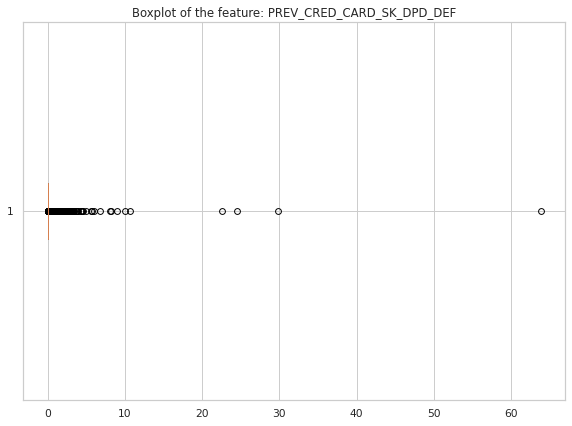

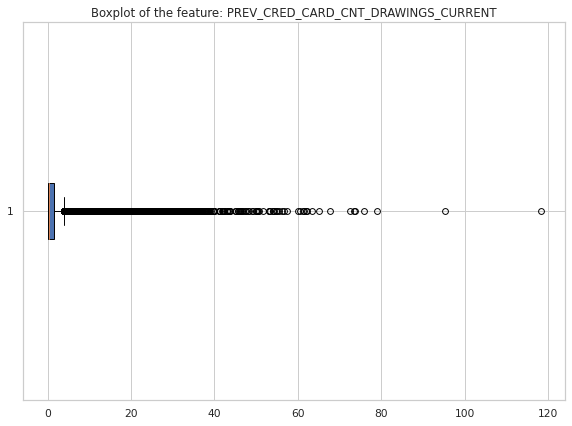

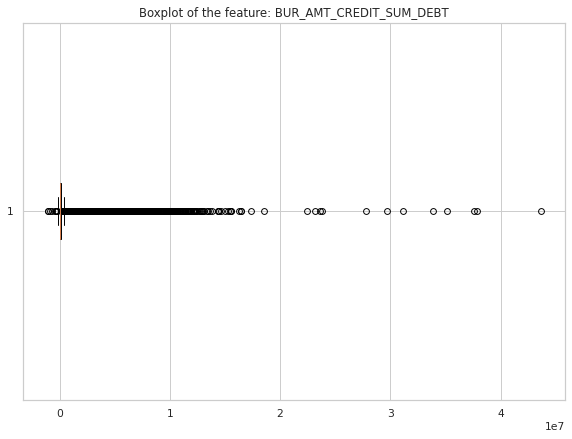

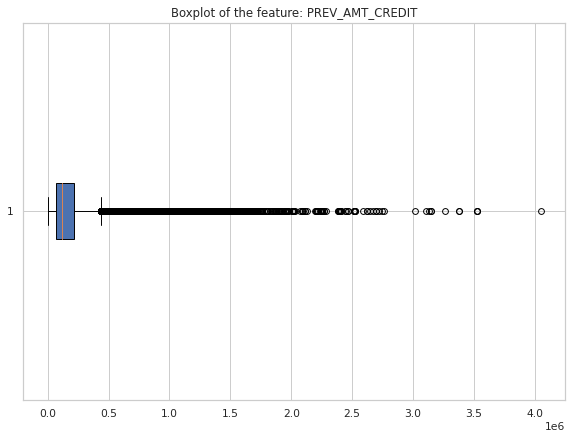

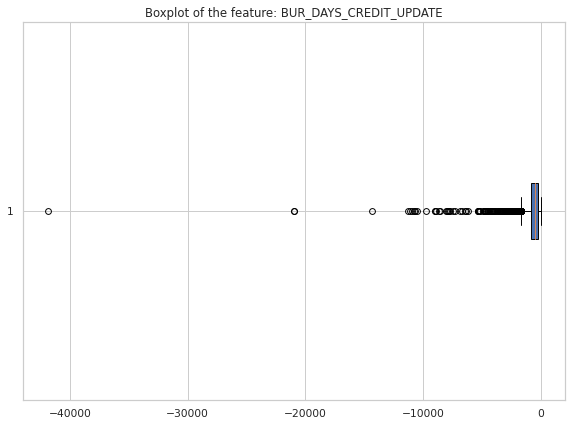

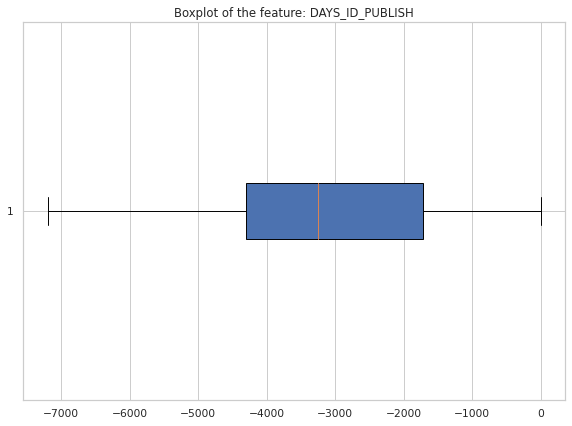

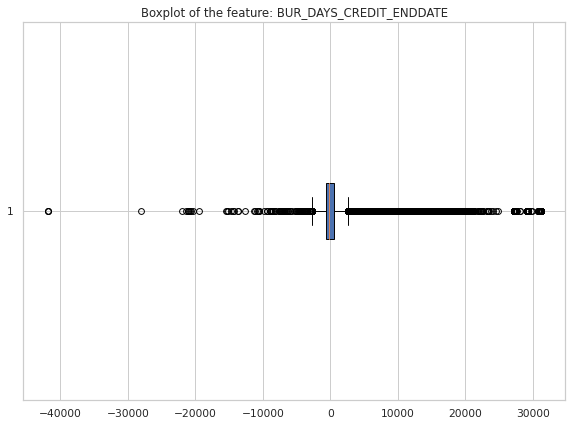

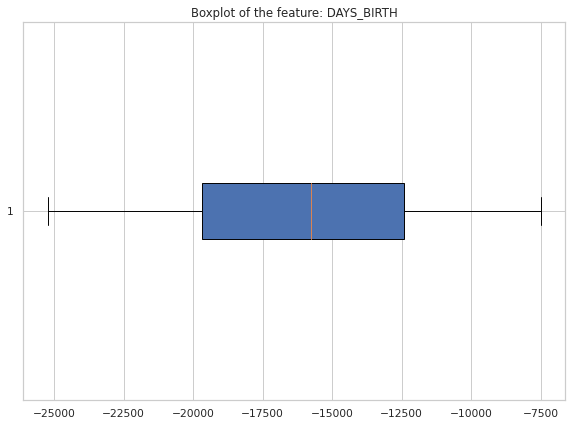

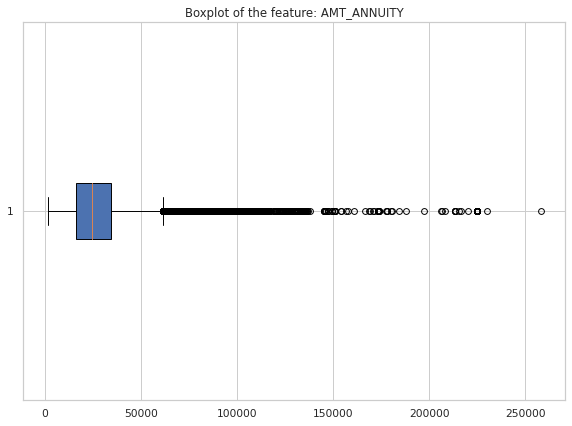

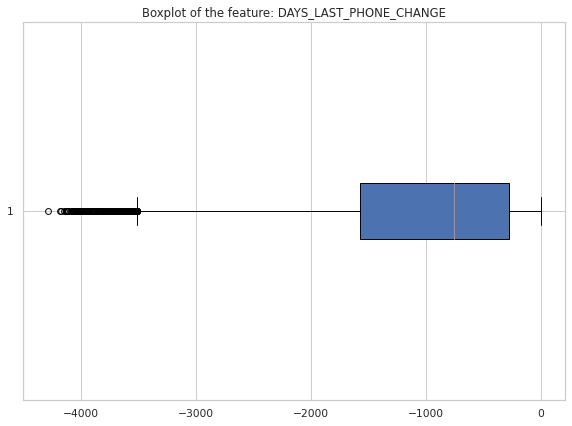

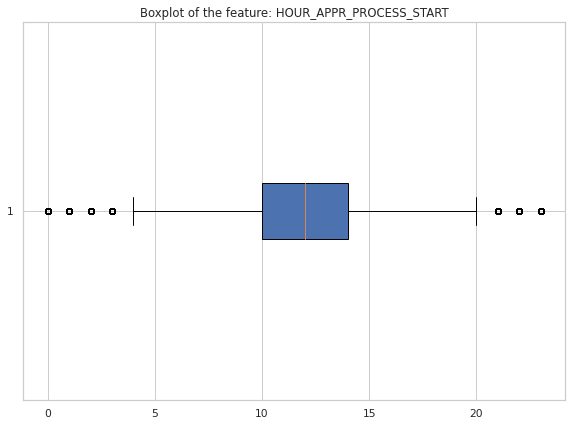

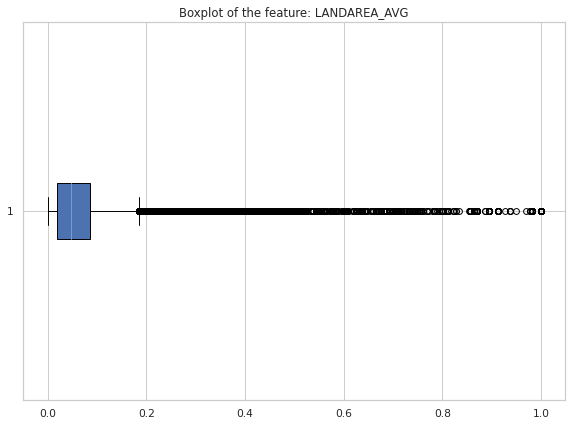

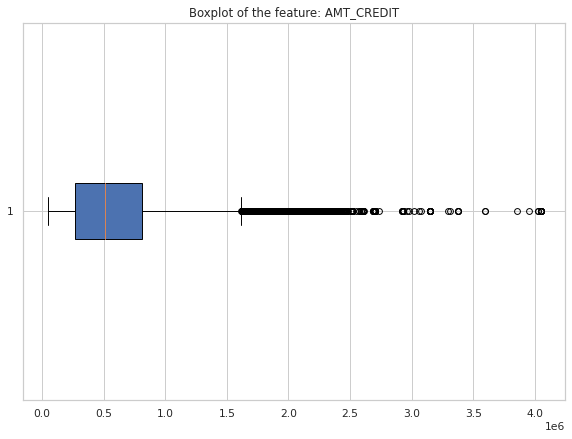

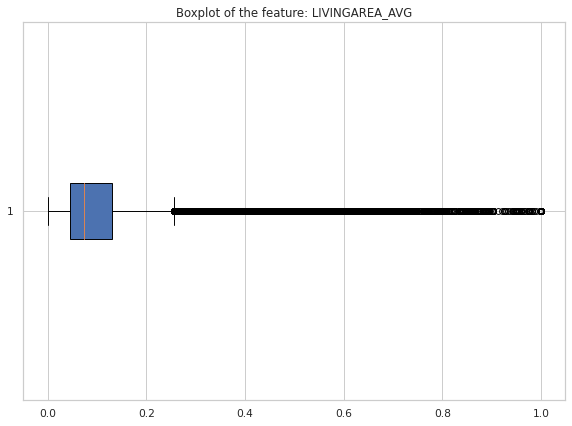

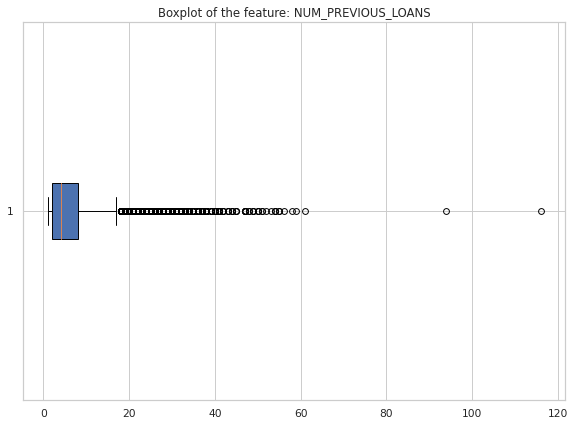

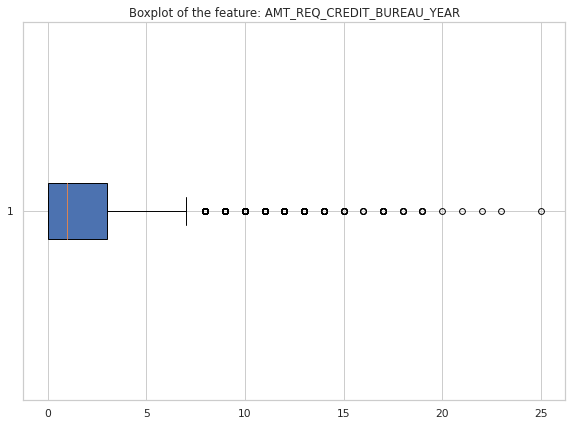

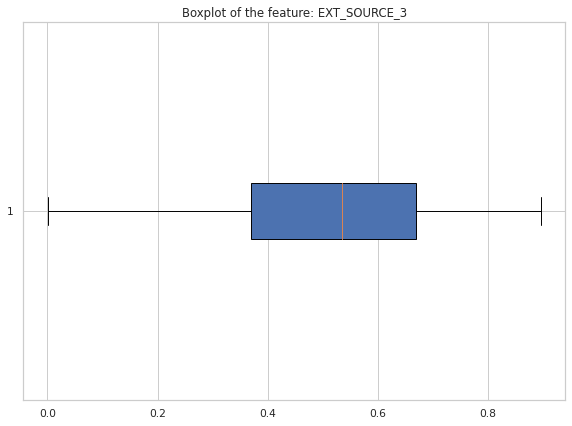

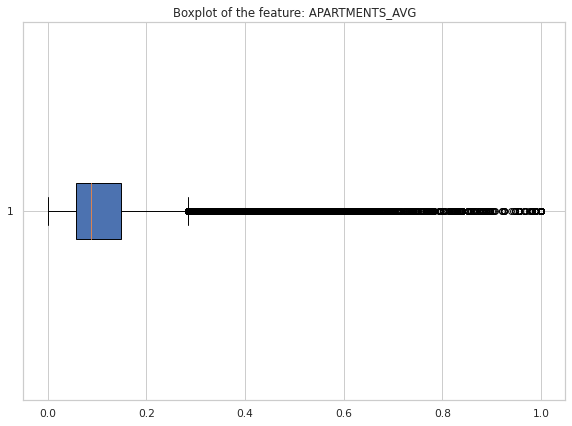

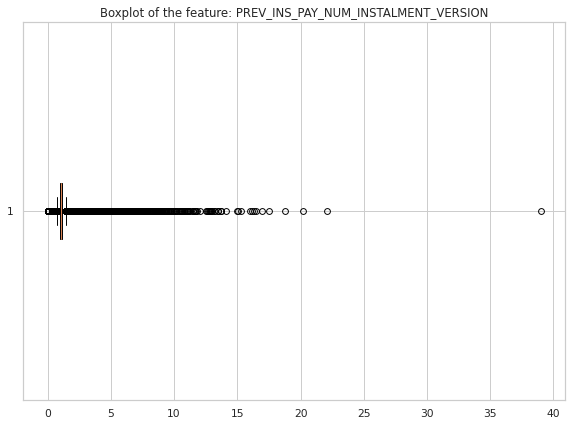

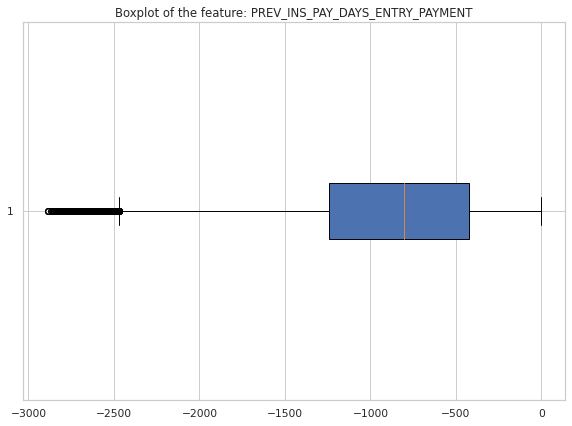

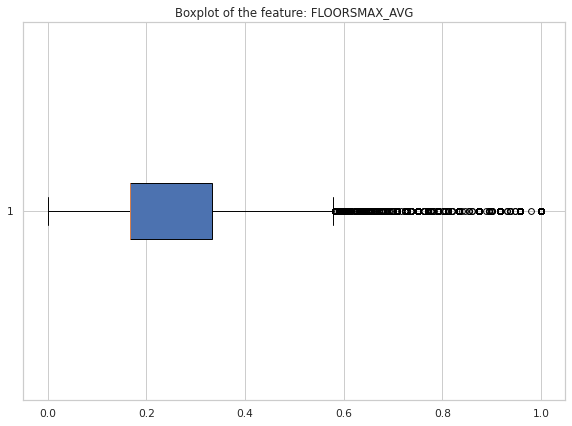

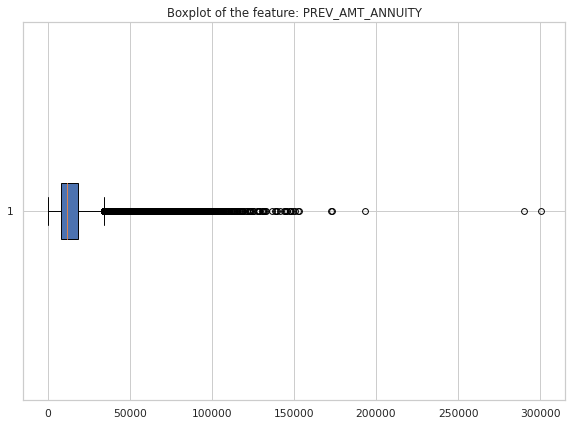

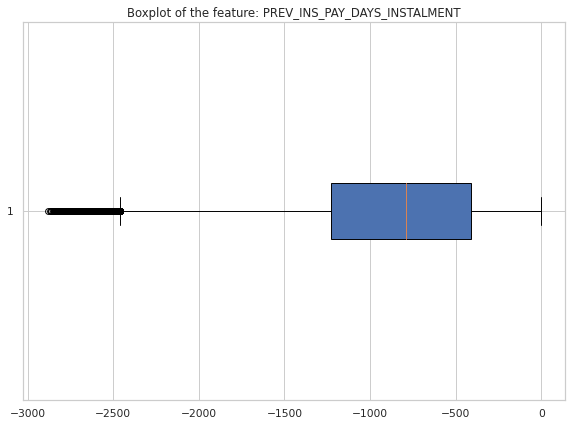

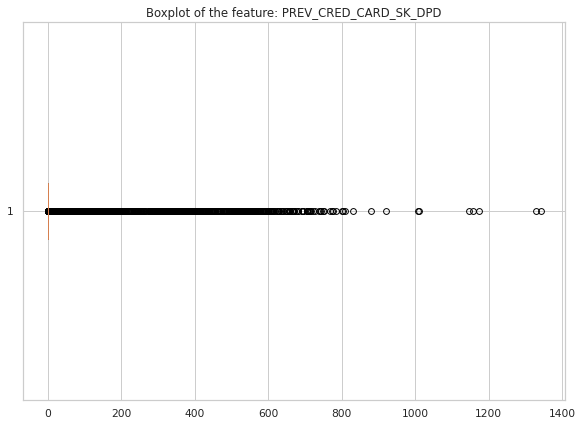

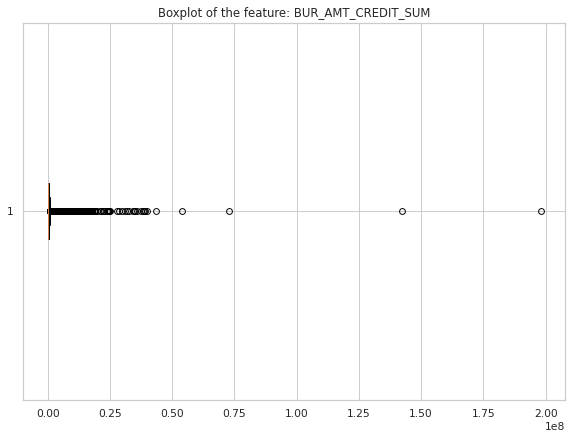

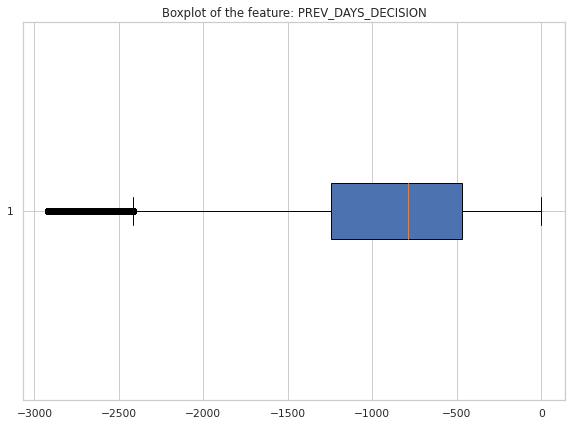

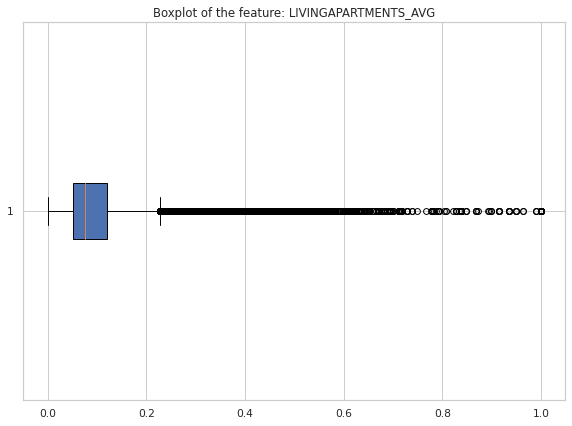

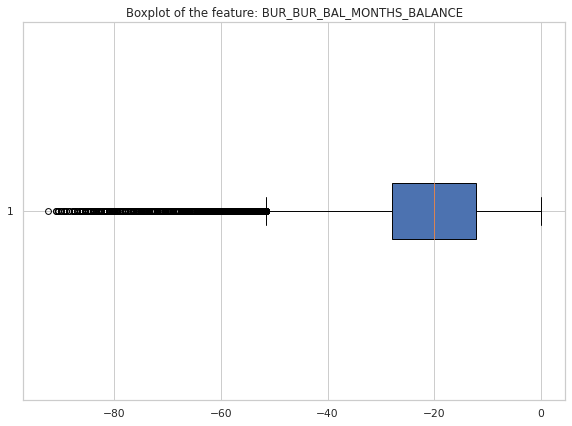

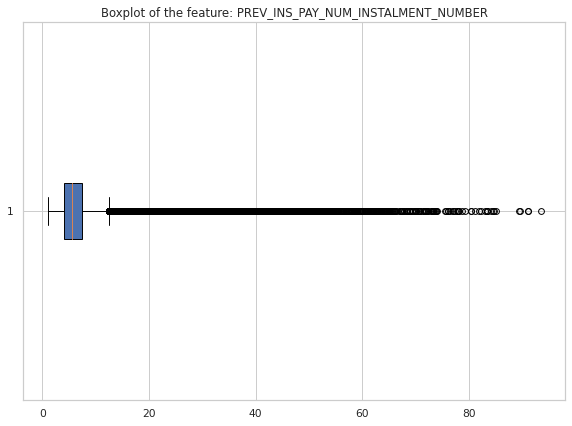

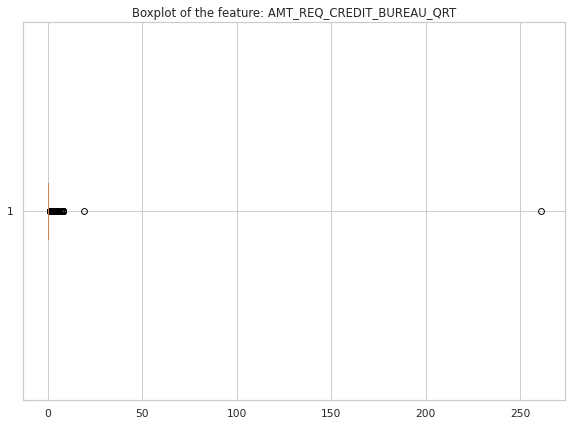

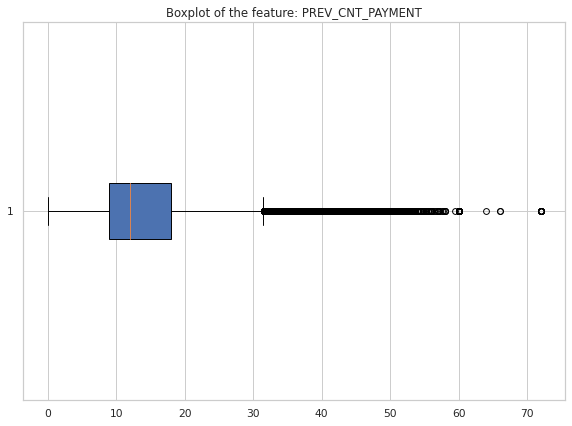

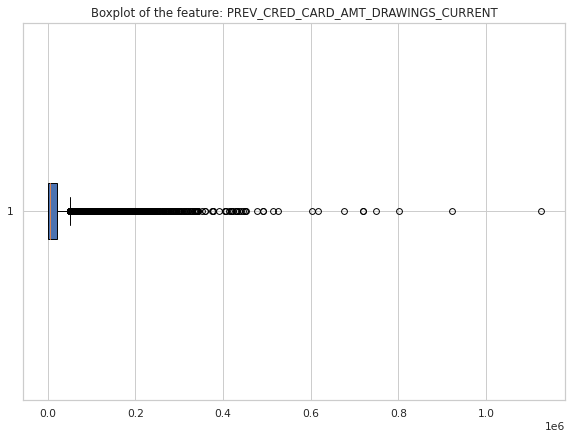

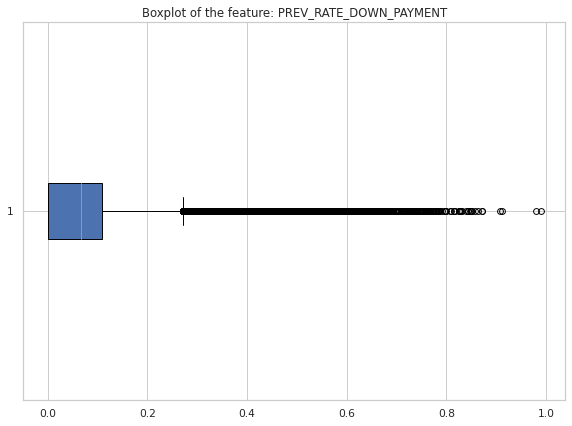

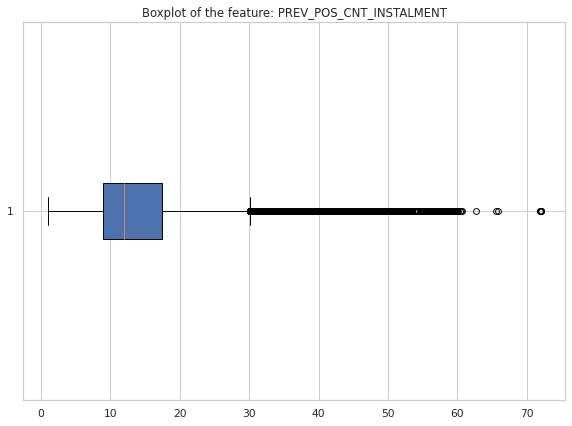

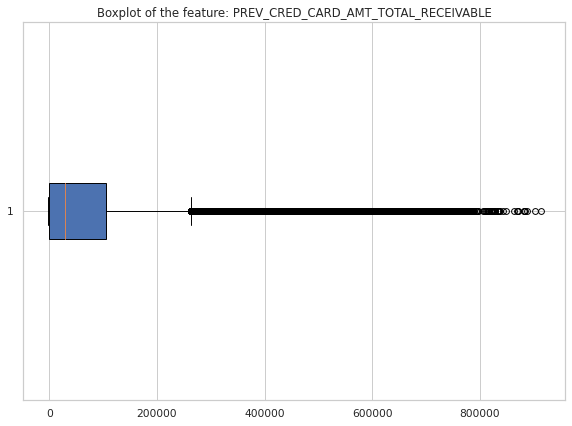

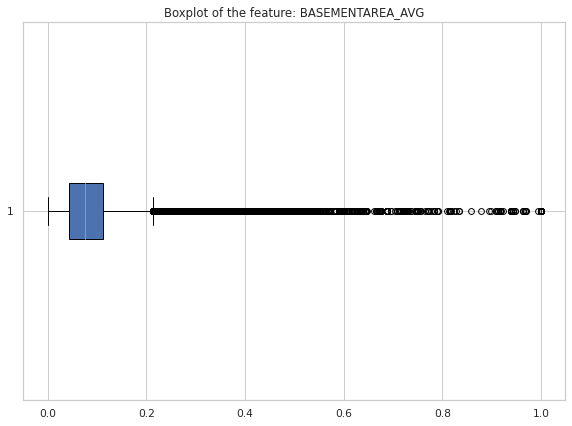

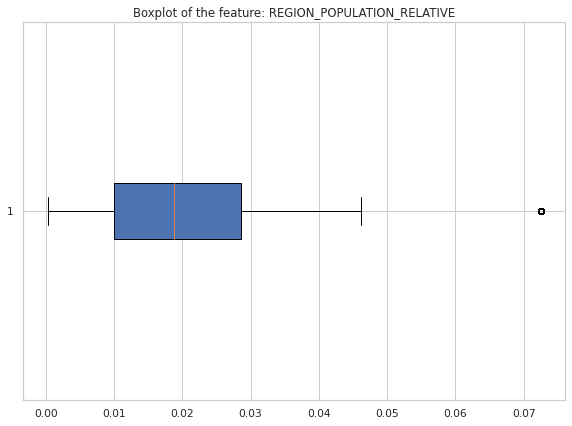

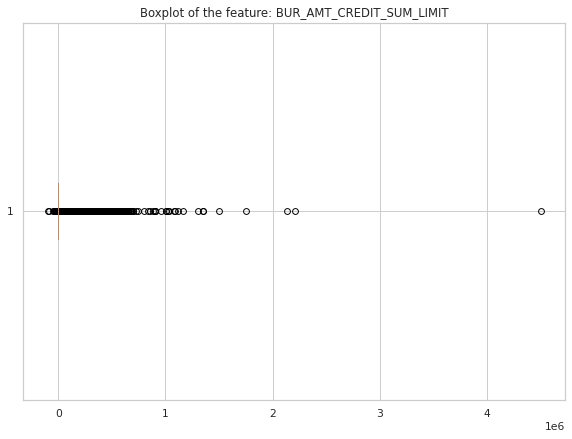

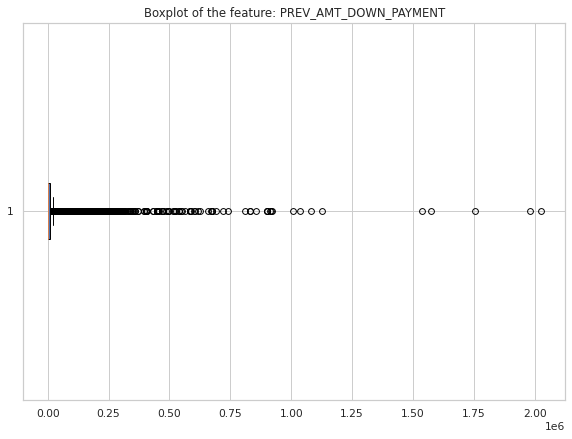

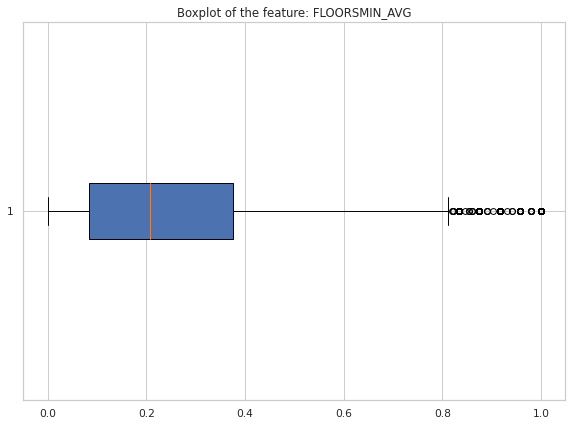

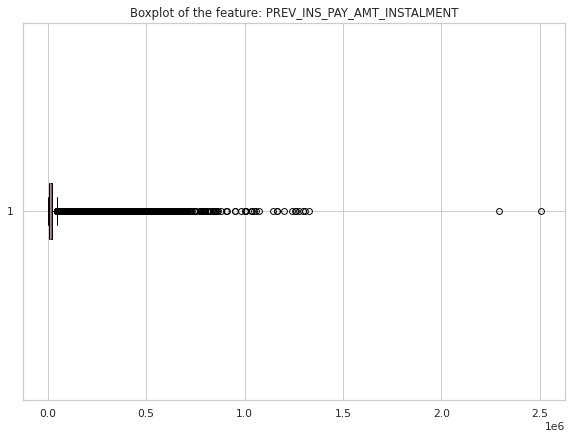

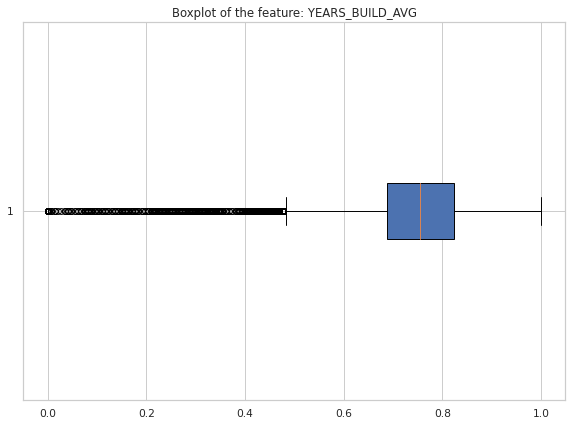

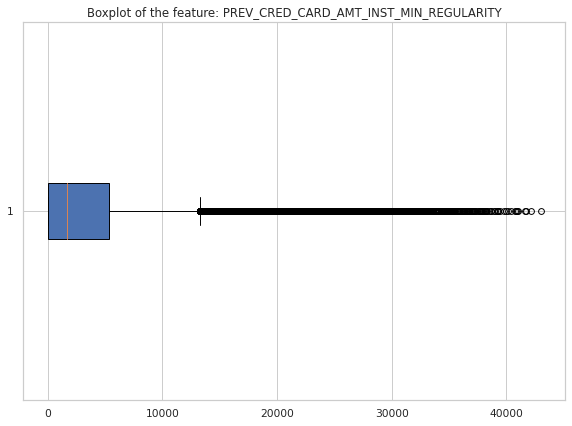

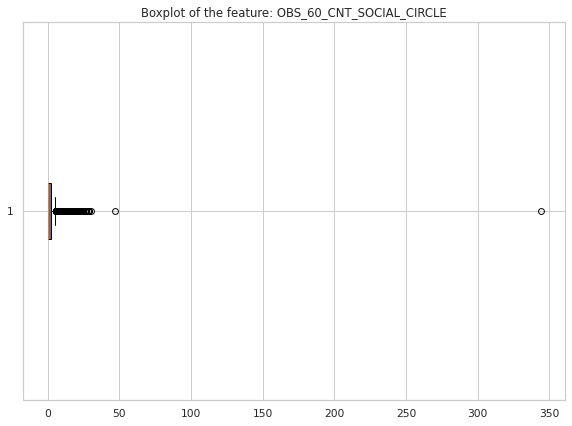

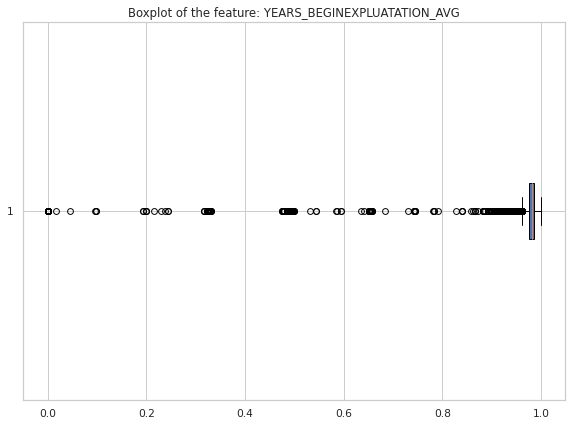

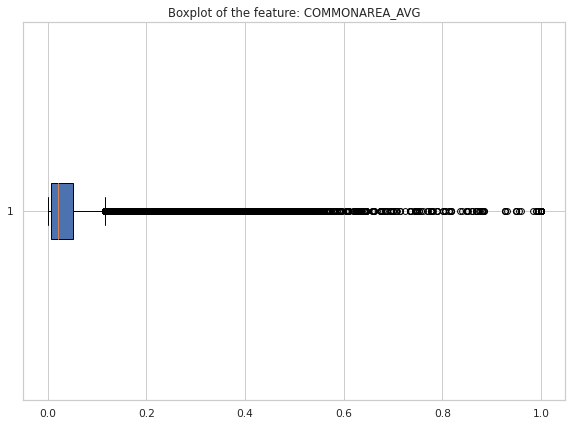

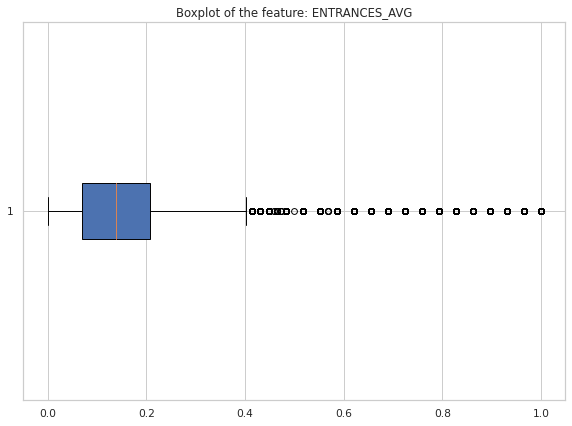

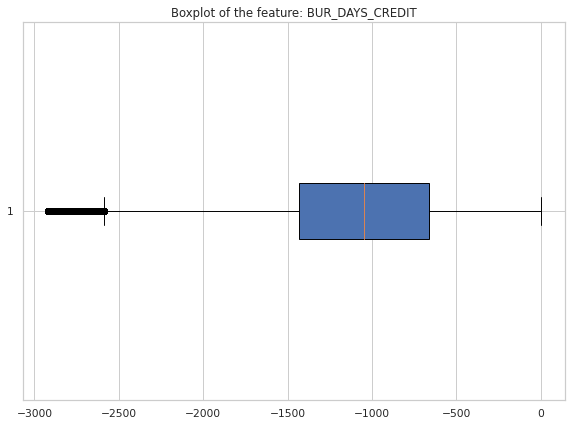

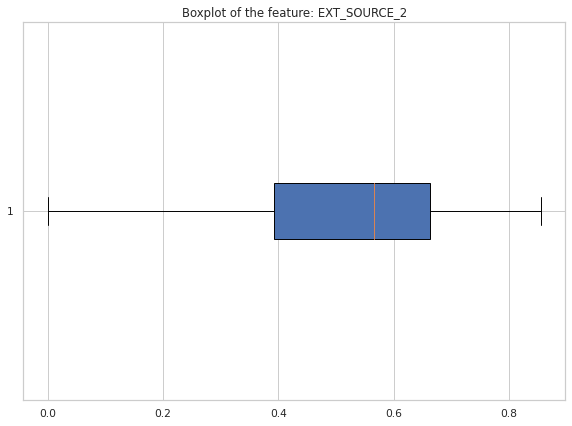

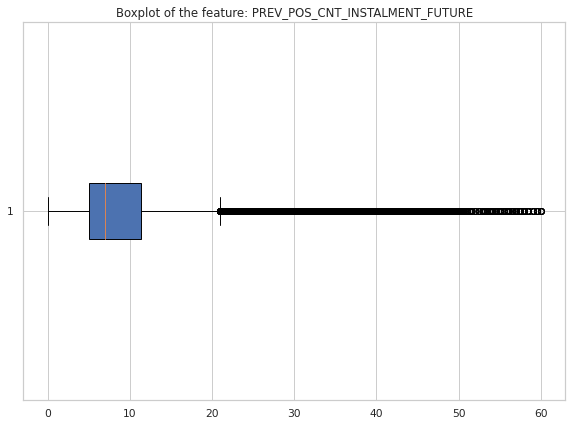

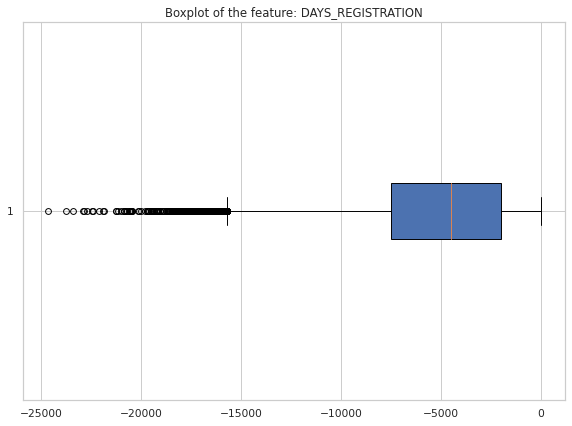

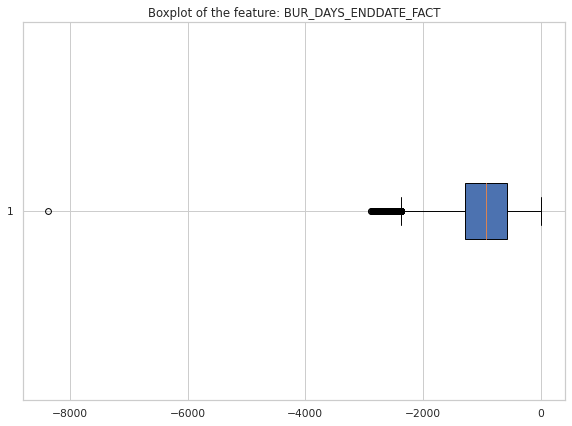

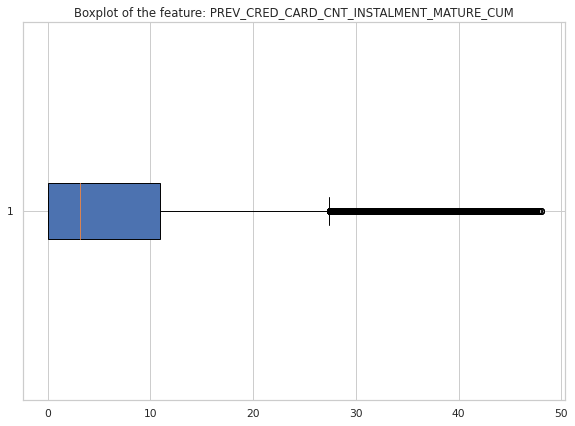

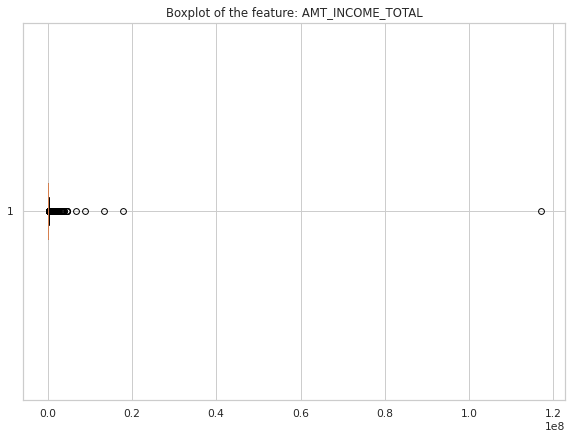

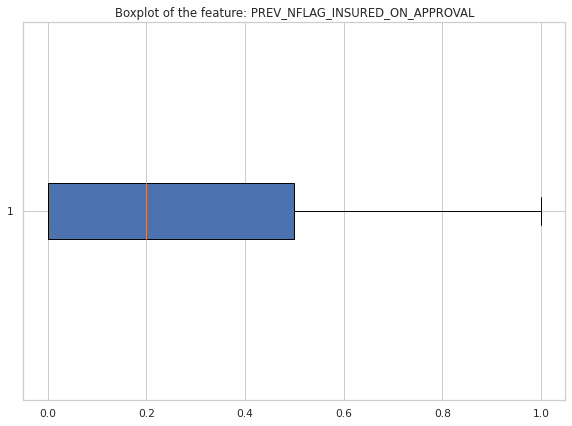

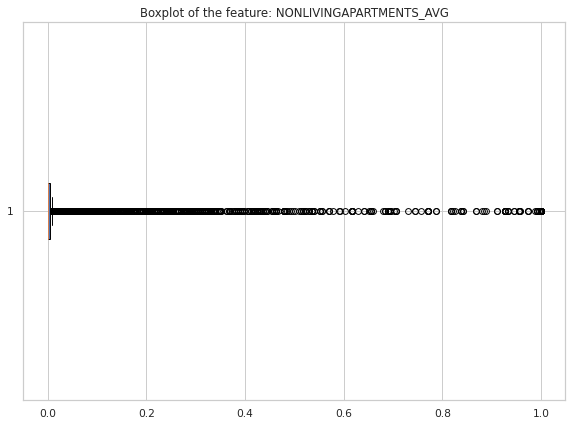

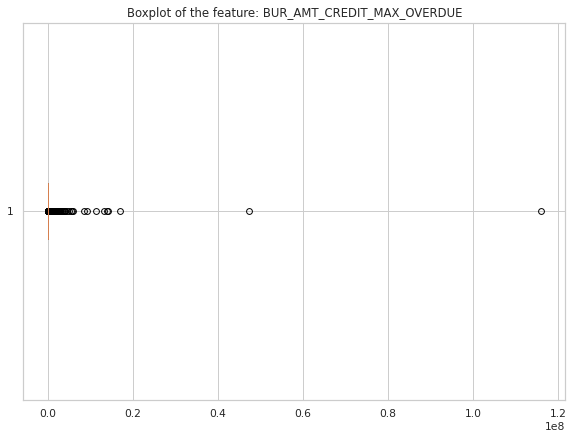

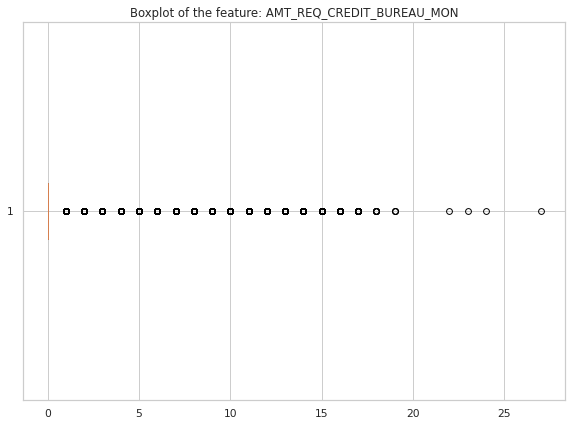

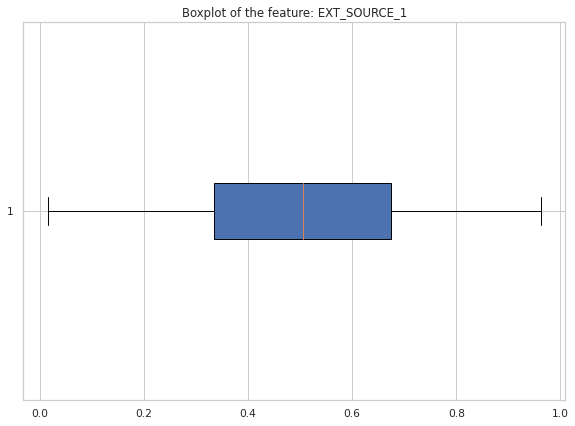

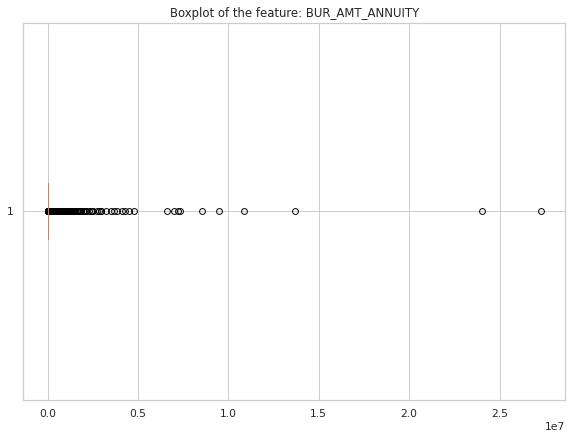

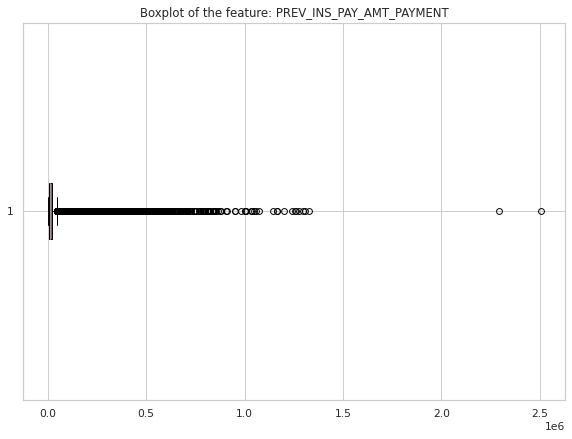

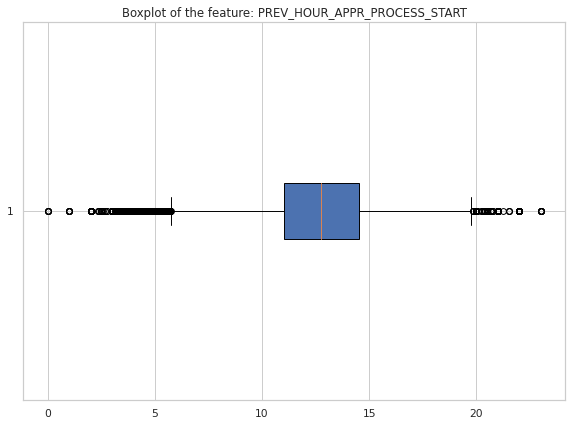

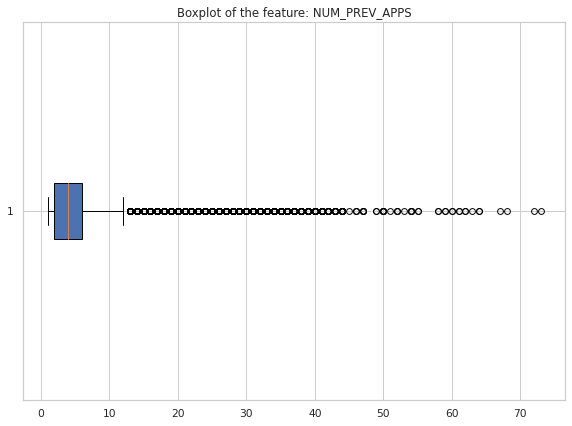

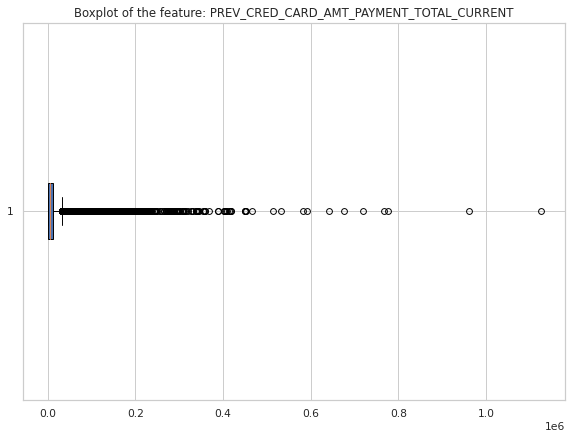

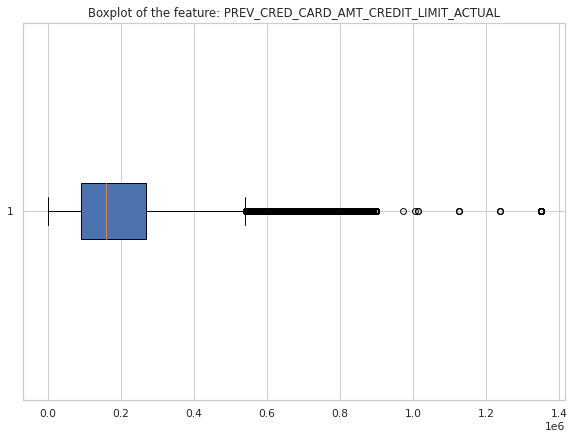

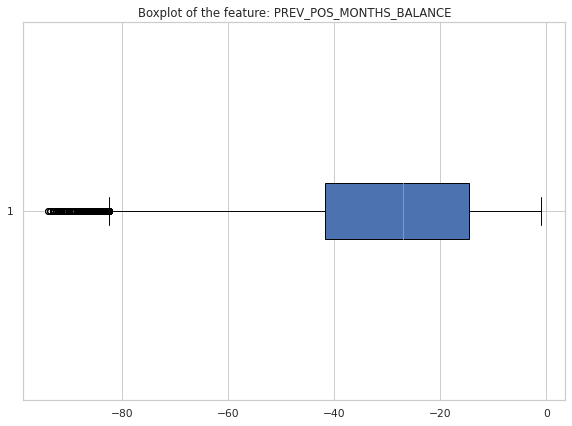

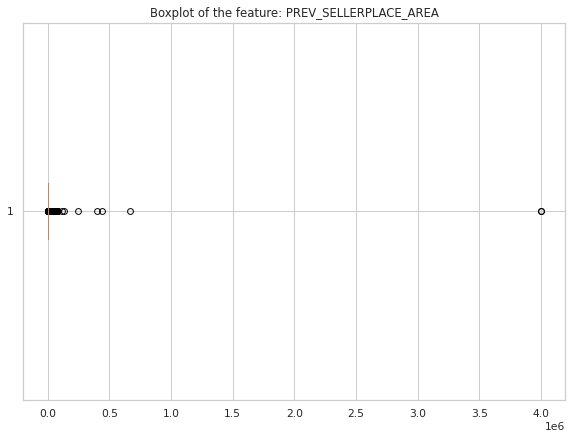

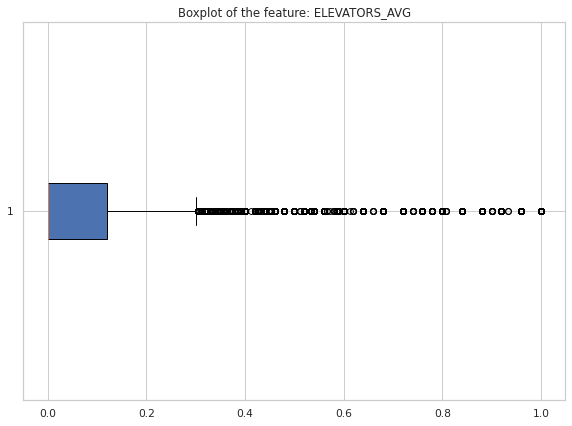

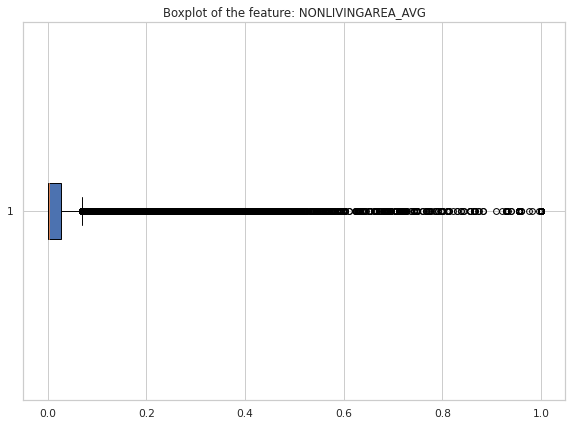

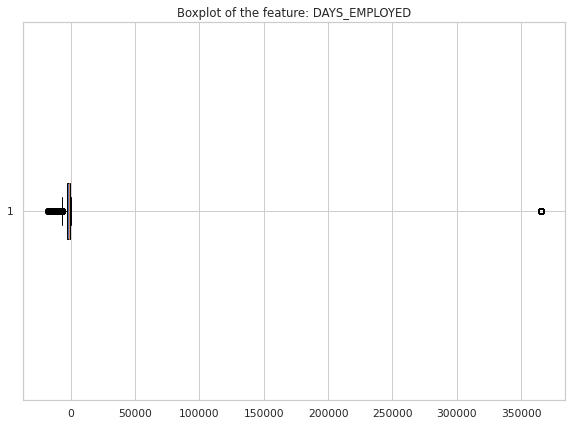

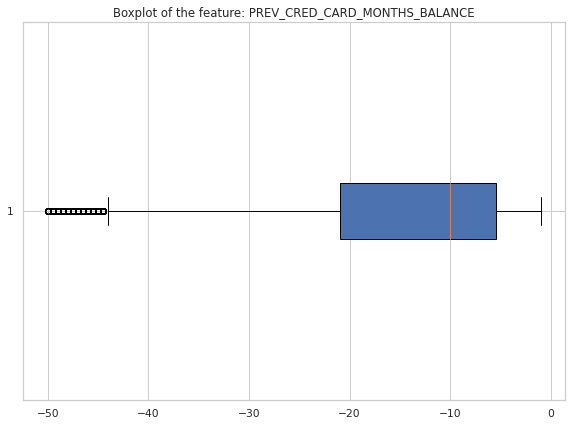

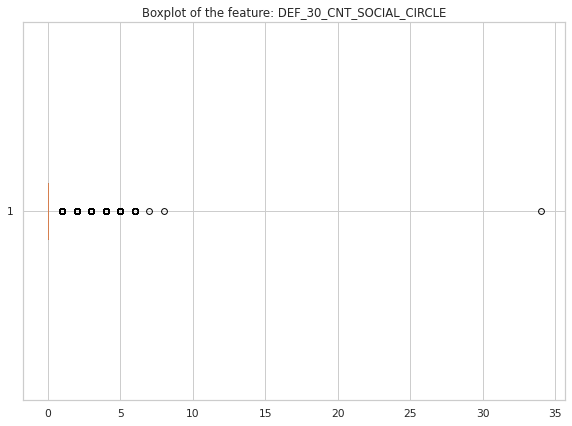

In [169]:
for feature in num_cols:
    fig, ax = plt.subplots(1, 1, figsize = (10, 7))
    plt.boxplot(train[feature].dropna(), patch_artist =True, vert = False)
    ax.set_title("Boxplot of the feature: " + feature)

In [170]:
# Replace outlier by nan
def outliers(df, col, q1=0.05, q3=0.95):
    q1, q3 = df[col].quantile(q1), df[col].quantile(q3)
    intr_qr = q3 - q1

    df[col] = np.where(df[col] > q3 + 1.5*intr_qr, np.nan, df[col])
    df[col] = np.where(df[col] < q1 - 1.5*intr_qr, np.nan, df[col])

In [171]:
for col in num_cols:
    outliers(train, col)

/tmp/ipykernel_32/3800658109.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3800658109.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3800658109.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3800658

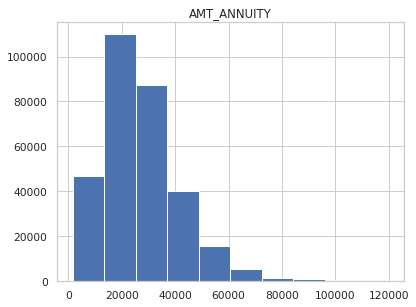

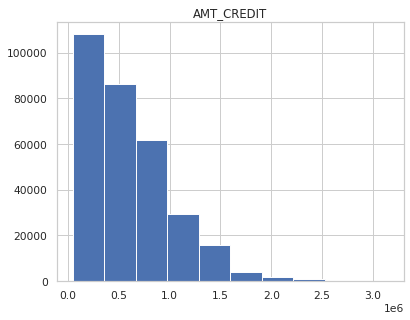

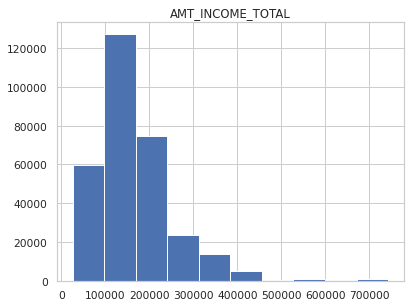

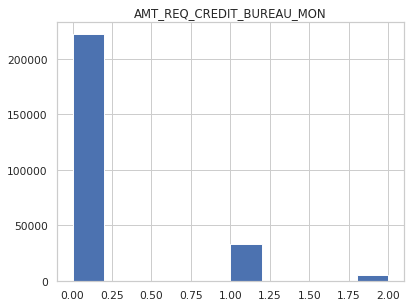

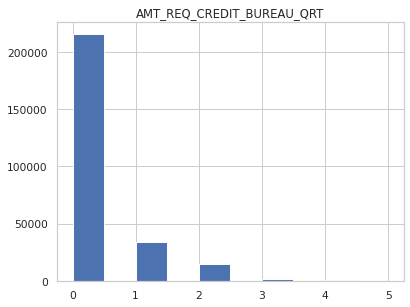

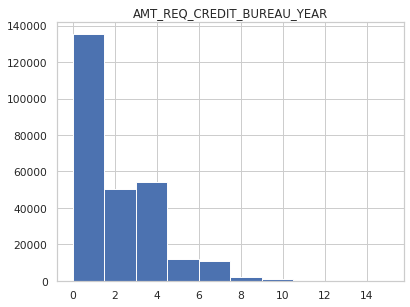

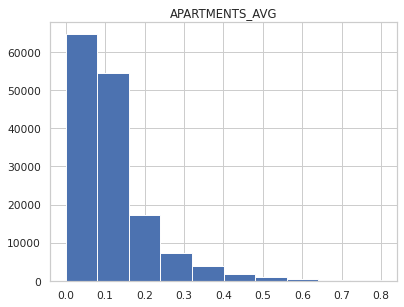

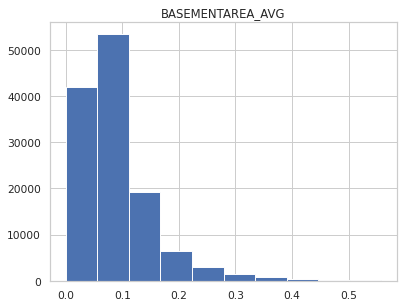

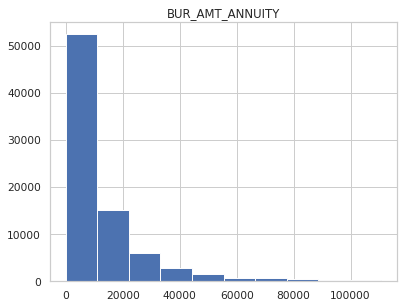

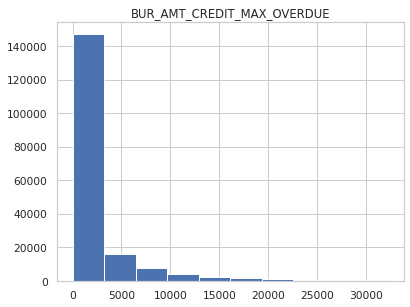

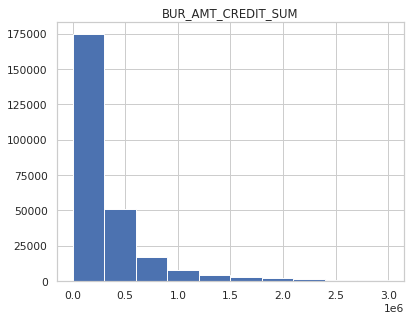

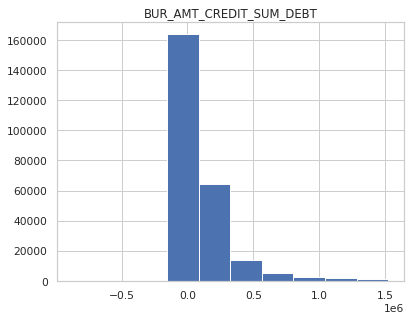

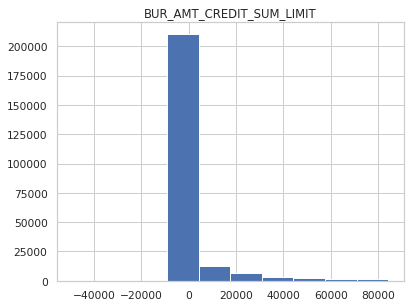

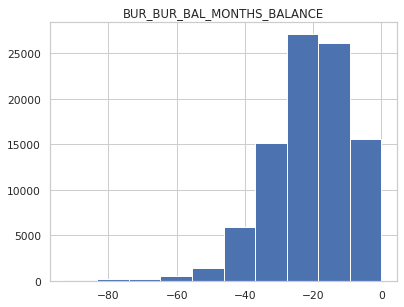

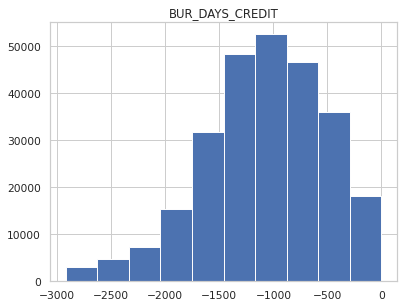

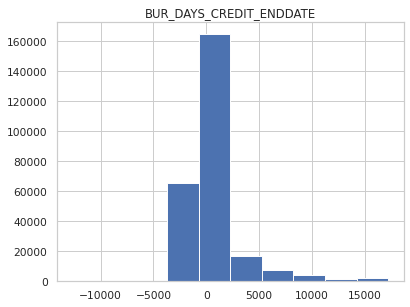

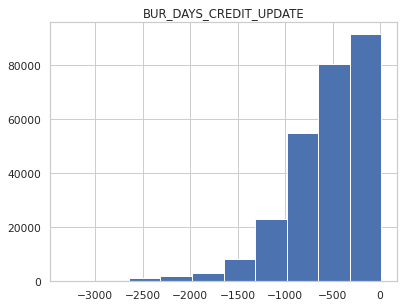

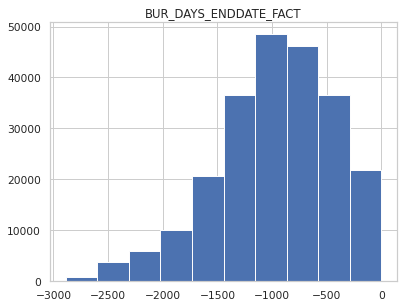

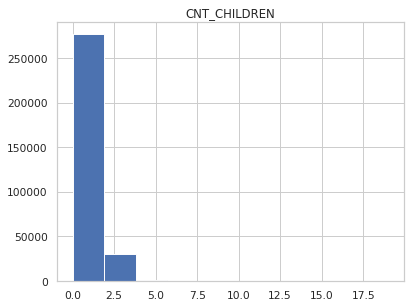

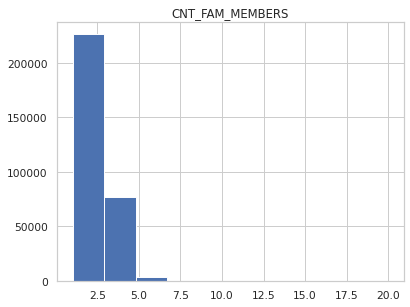

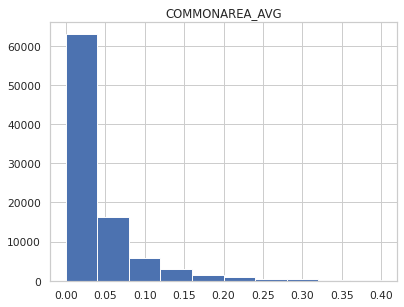

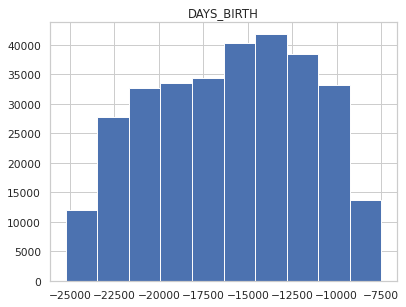

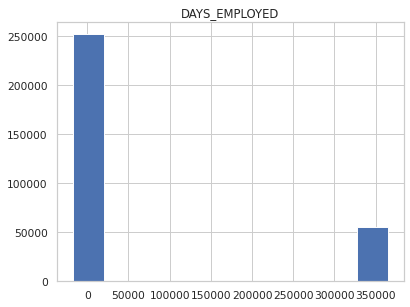

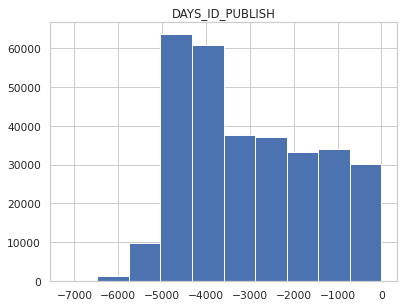

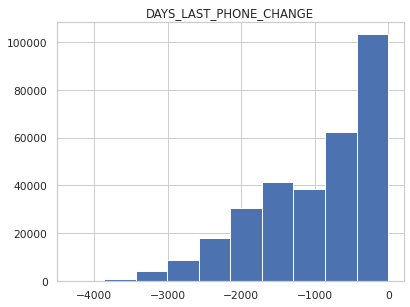

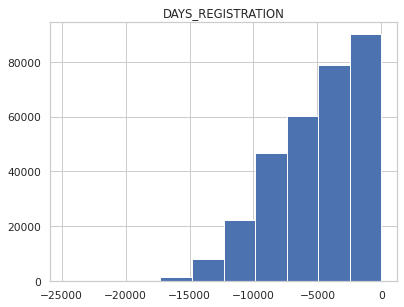

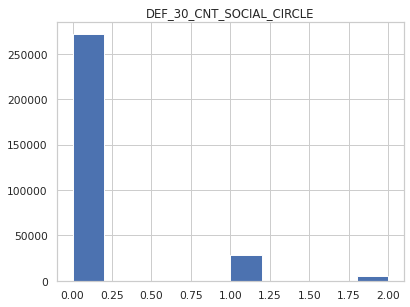

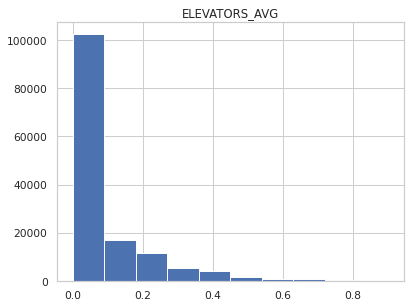

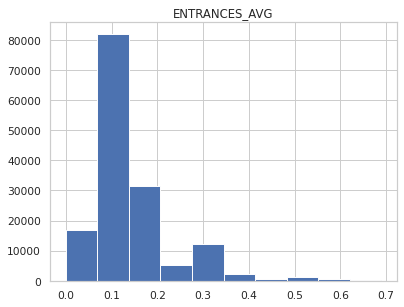

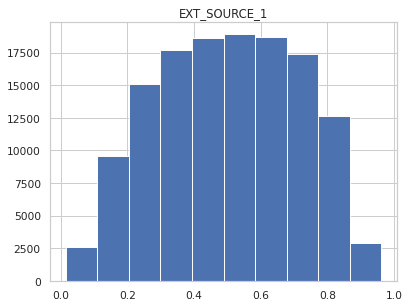

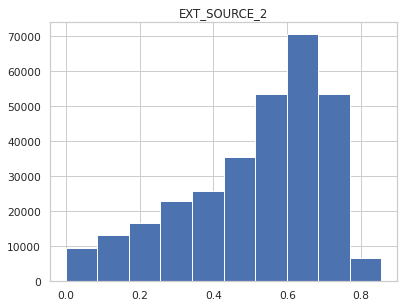

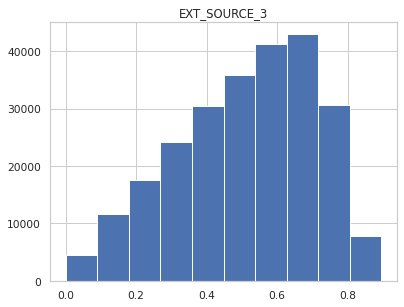

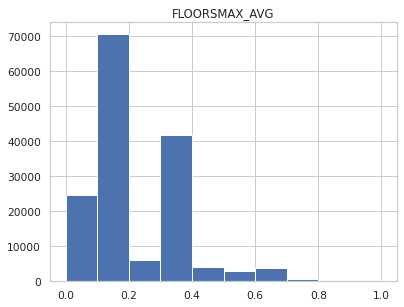

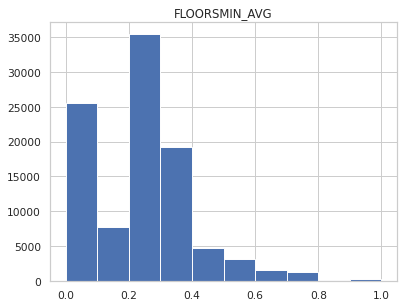

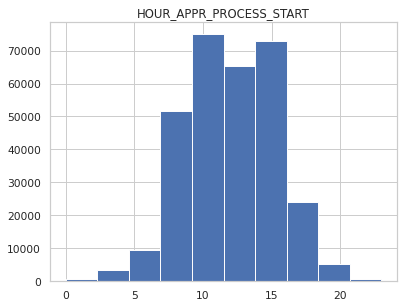

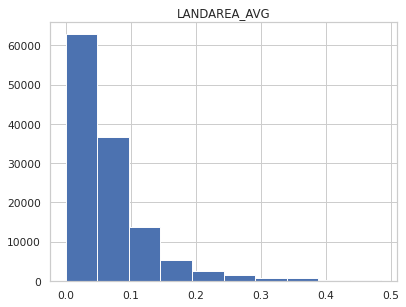

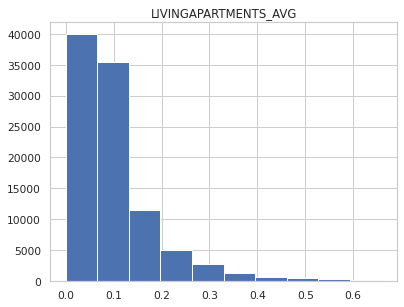

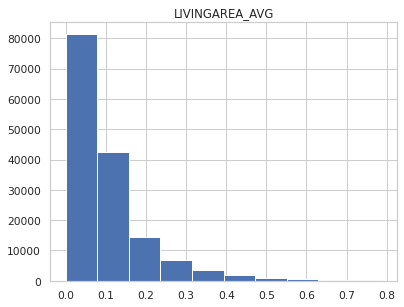

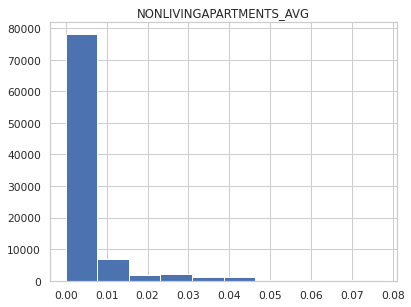

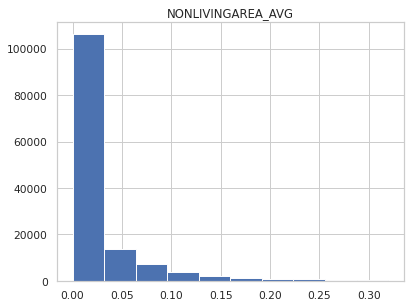

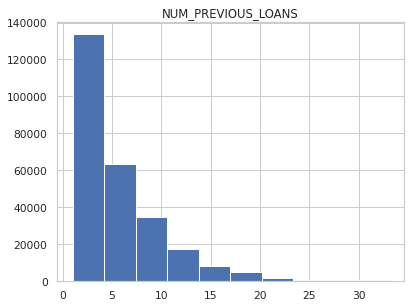

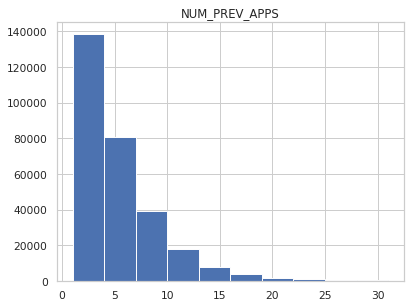

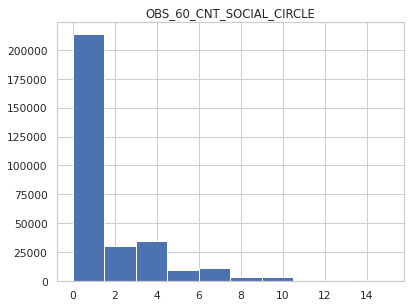

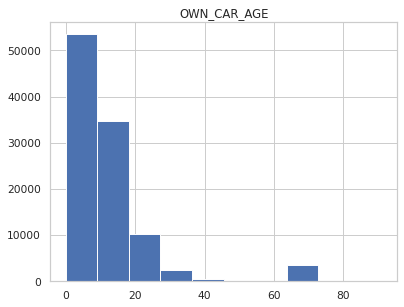

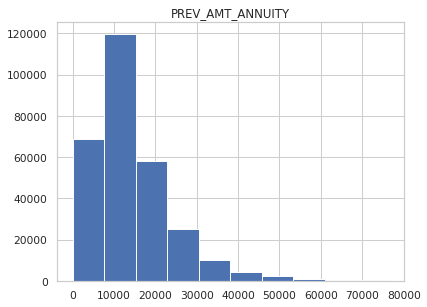

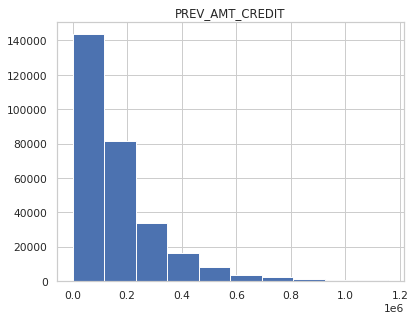

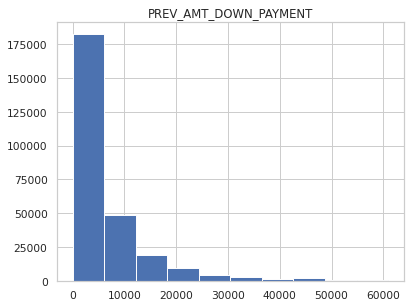

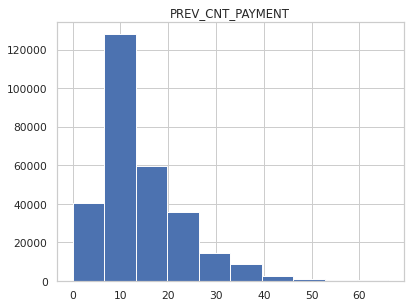

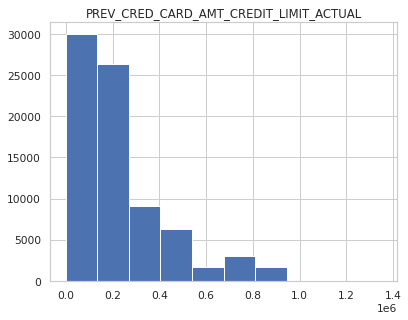

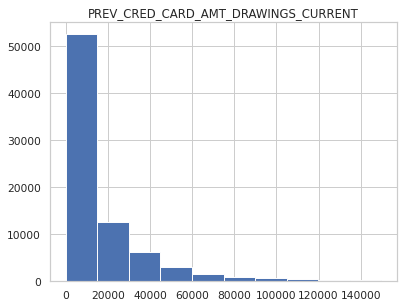

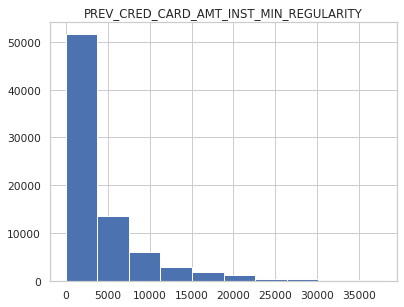

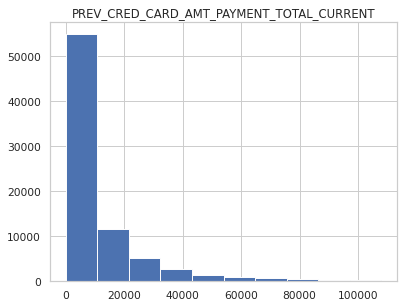

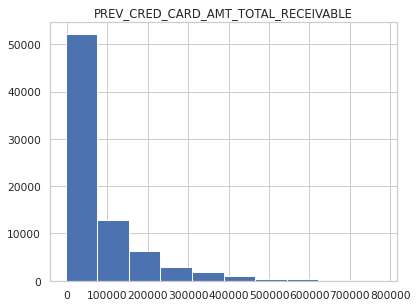

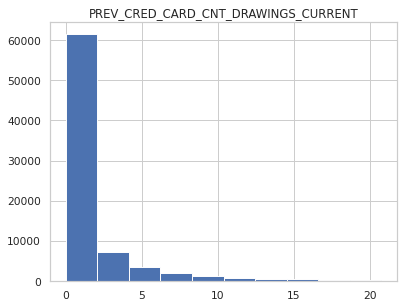

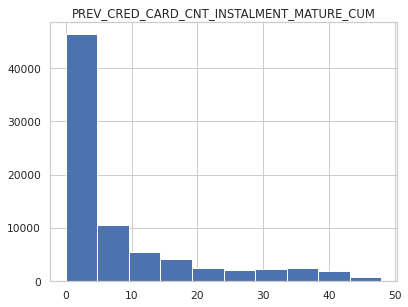

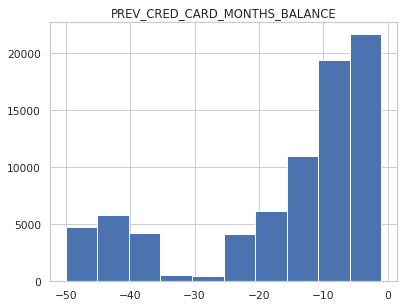

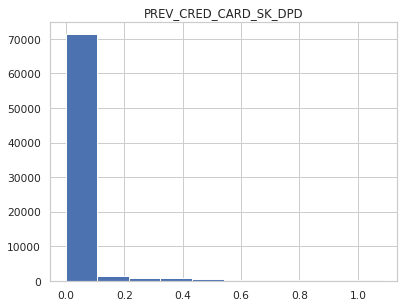

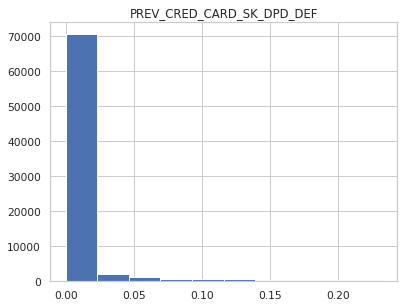

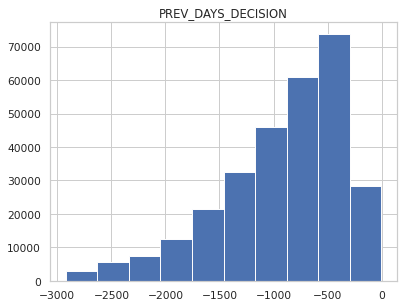

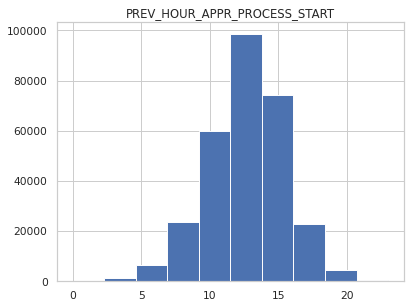

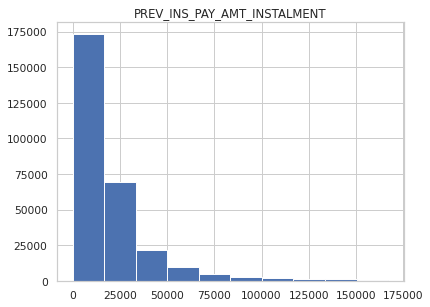

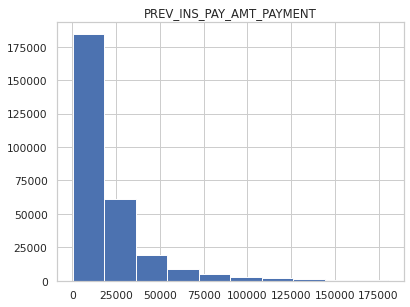

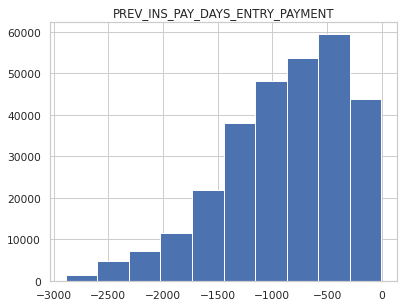

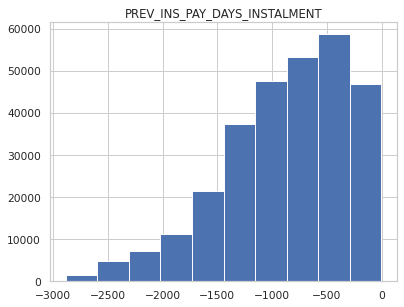

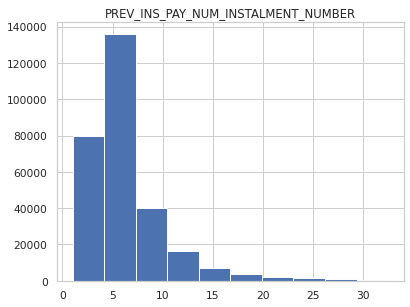

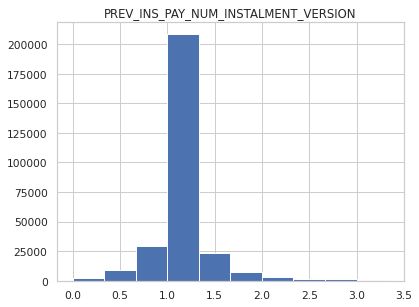

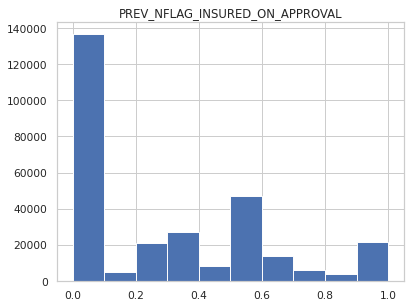

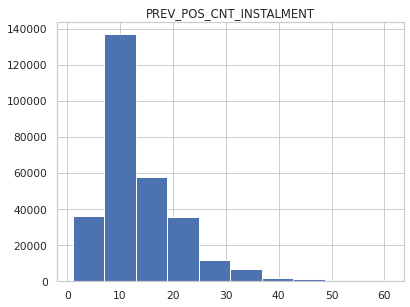

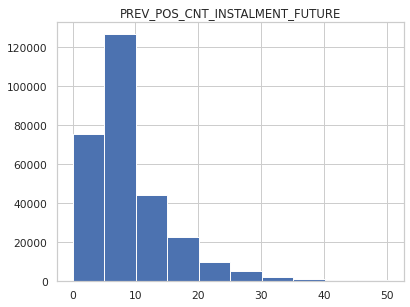

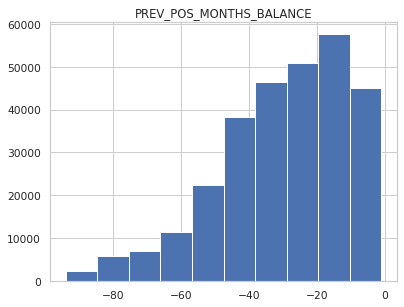

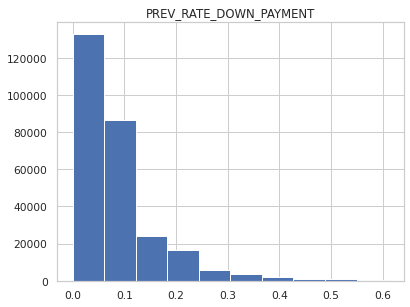

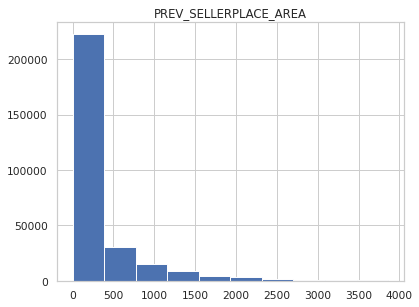

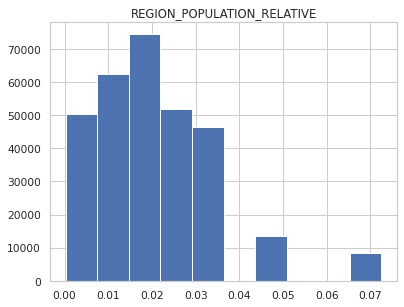

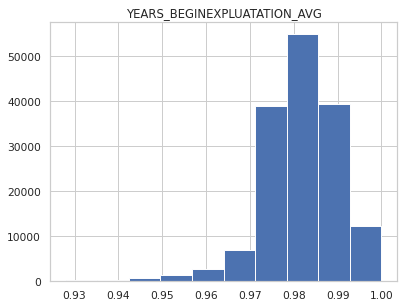

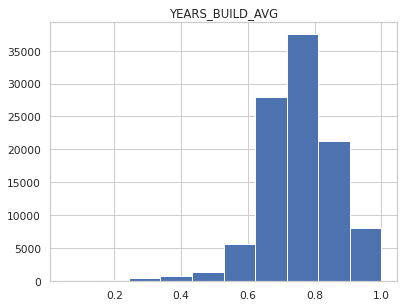

In [172]:
for i, col in enumerate(sorted(num_cols + ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'OWN_CAR_AGE'])):
    plt.hist(train[col])
    plt.title("{}".format(col))
    plt.show()

Text(0, 0.5, 'Count')

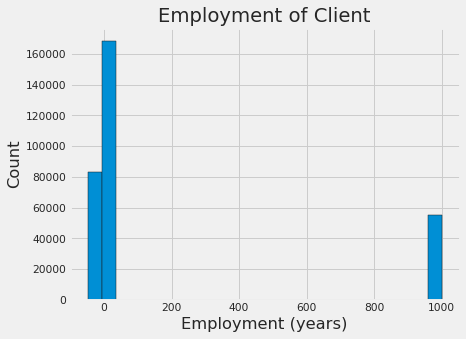

In [173]:
# Plot the distribution of ages in years
plt.style.use('fivethirtyeight')
plt.hist(train['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('Employment of Client'); plt.xlabel('Employment (years)'); plt.ylabel('Count')

DAYS_EMPLOYED has outliers. These strange outliers are approximately 1000 years, it is impossible. With more than 55k observations like that, about 20% --> drop out

In [174]:
train.drop(columns=['DAYS_EMPLOYED'], inplace=True)
test.drop(columns=['DAYS_EMPLOYED'], inplace=True)

/tmp/ipykernel_32/3265200272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3265200272.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
train.shape, test.shape

((307511, 97), (48744, 96))

# Domain feature creation

In [176]:
train_work = train.copy(deep=True)

In [177]:
# INCOME_CREDIT_PERCENT: the percentage of the income relative to a client's credit amount
train_work['INCOME_CREDIT_PERCENT'] = train_work['AMT_INCOME_TOTAL']  / train_work['AMT_CREDIT']

# ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
train_work['ANNUITY_INCOME_PERCENT'] = train_work['AMT_ANNUITY'] / train_work['AMT_INCOME_TOTAL'] 

# CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
train_work['CREDIT_TERM'] = train_work['AMT_ANNUITY'] / train_work['AMT_CREDIT'] 

# INCOME_PER_PERSON: Income per person in a family
train_work['INCOME_PER_PERSON'] = train_work['AMT_INCOME_TOTAL'] / train_work['CNT_FAM_MEMBERS']

# CNT_ADULT_FAM_MEMBER: number of adult members in a family
train_work['CNT_ADULT_FAM_MEMBER'] = train_work['CNT_FAM_MEMBERS'] - train_work['CNT_CHILDREN']

# RATIO_CHILDREN_TO_ADULTS: ratio of the children - adult
train_work['RATIO_CHILDREN_TO_ADULTS'] = train_work['CNT_CHILDREN'] / train_work['CNT_ADULT_FAM_MEMBER']

# RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS: the credit loan per person in a family
train_work['RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS'] = train_work['AMT_CREDIT'] / train_work['CNT_FAM_MEMBERS']

# RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER: the credit loan per adult people in a family
train_work['RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER'] = train_work['AMT_CREDIT'] / train_work['CNT_ADULT_FAM_MEMBER']

# AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER: the income per adult people in a family
train_work['AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER'] = train_work['AMT_INCOME_TOTAL'] / train_work['CNT_ADULT_FAM_MEMBER']

In [178]:
doamin_feats = ['INCOME_CREDIT_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'INCOME_PER_PERSON', 'CNT_ADULT_FAM_MEMBER', 'RATIO_CHILDREN_TO_ADULTS',
       'RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS',
       'RATIO_AMT_CREDIT_TO_CNT_ADULT_FAM_MEMBER',
       'AMT_INCOME_TOTAL_PER_ADULT_FAM_MEMBER']

In [179]:
def distribution_domain(x):
    plot = sns.distplot(train_work[x])
    plt.title(x)
    plt.show()

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




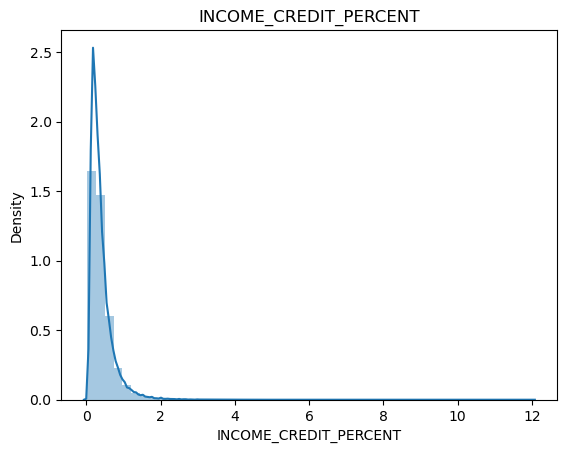

In [180]:
plt.style.use('default')
distribution_domain('INCOME_CREDIT_PERCENT')

Most of people have **enough income to pay for their credit**. Some people even have 8 times more than the amount of the loan.

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




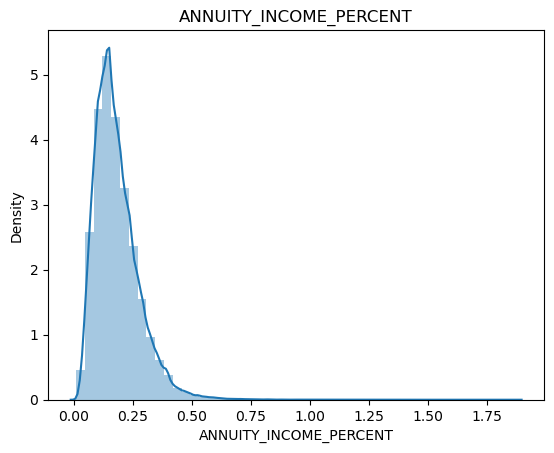

In [181]:
distribution_domain('ANNUITY_INCOME_PERCENT')

The most frequent percentage of annuity per income is below 25%. That is, **most of client have to spend at about 1/4 of their income to pay for the debt**.

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




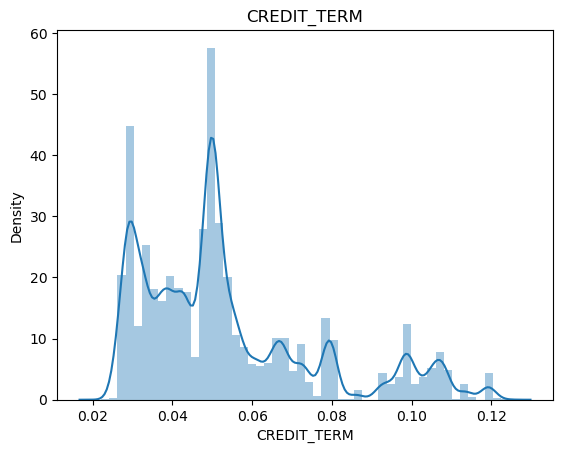

In [182]:
distribution_domain("CREDIT_TERM")

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




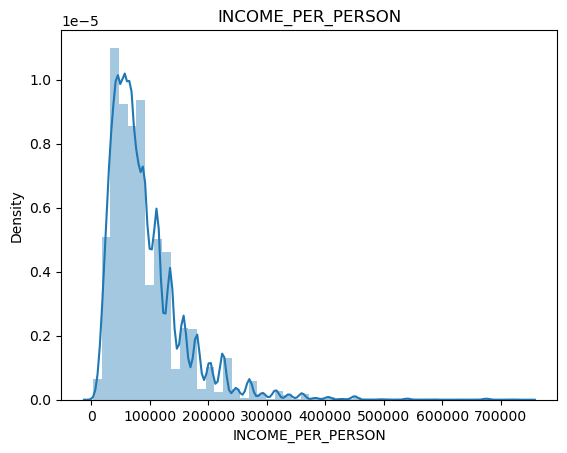

In [183]:
distribution_domain("INCOME_PER_PERSON")

Income of the person is the income of the client divide for the members of his/her family. The most frequent income per person is **below 100000**.

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




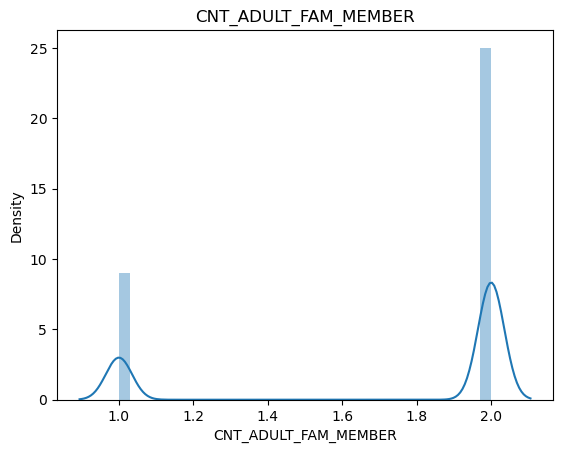

In [184]:
distribution_domain("CNT_ADULT_FAM_MEMBER")

The adult members in the family is the ones who can make money to pay for the loan. Most of the family have 1 - 2 adults.

/tmp/ipykernel_32/1550006650.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




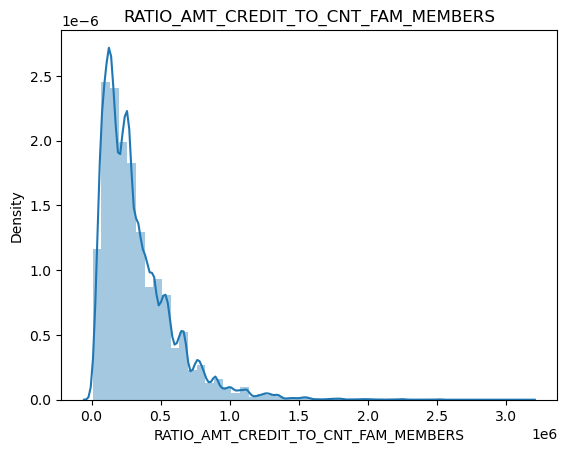

In [185]:
distribution_domain("RATIO_AMT_CREDIT_TO_CNT_FAM_MEMBERS")

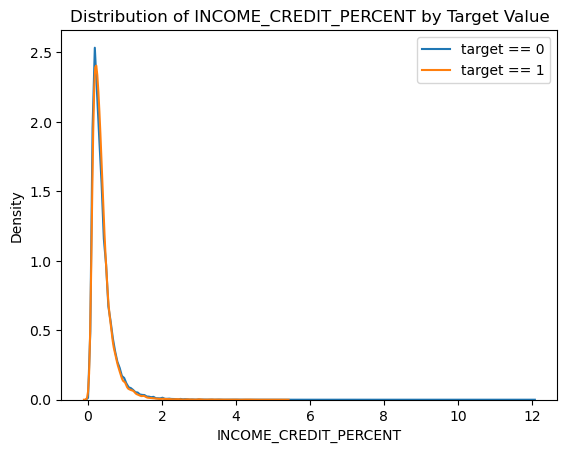

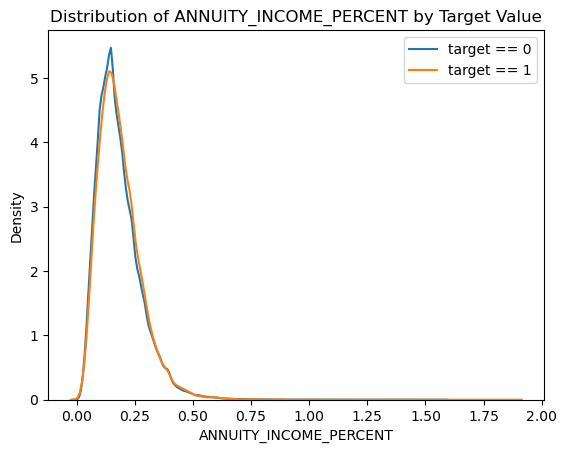

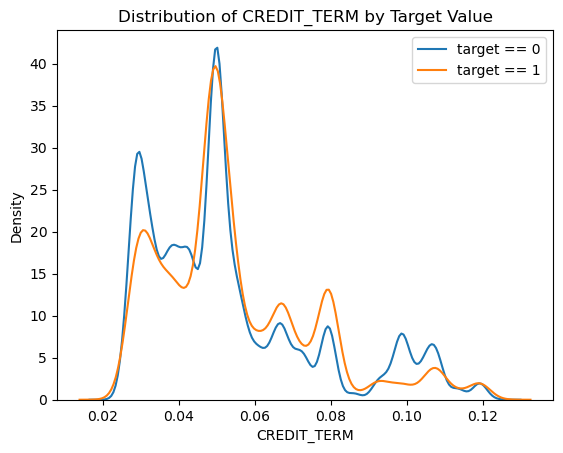

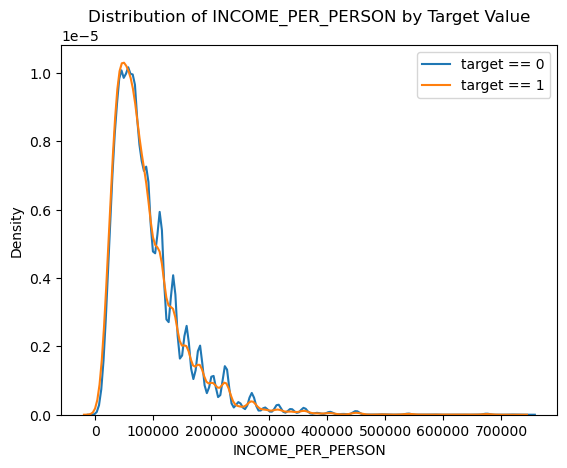

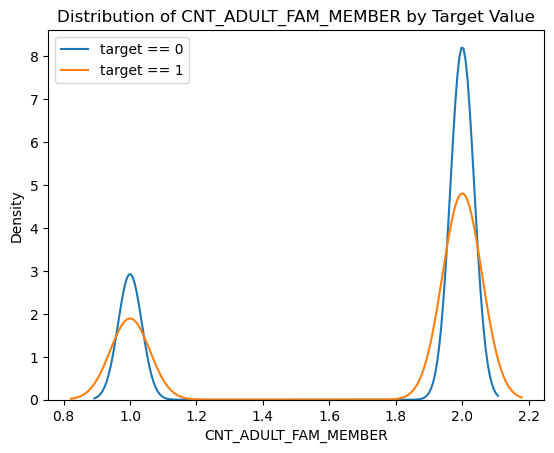

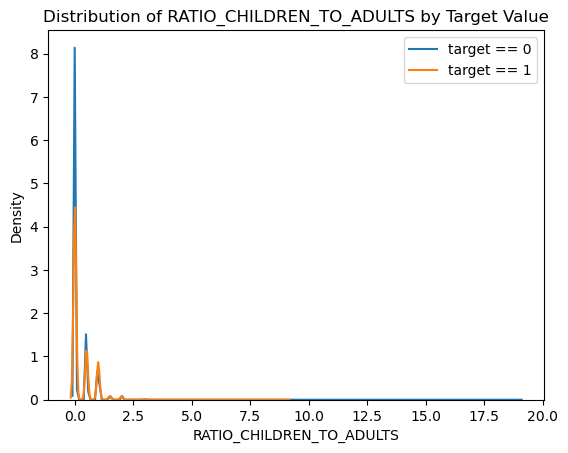

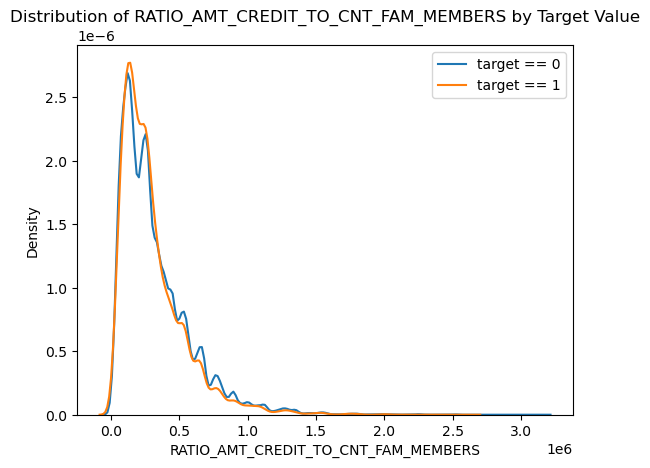

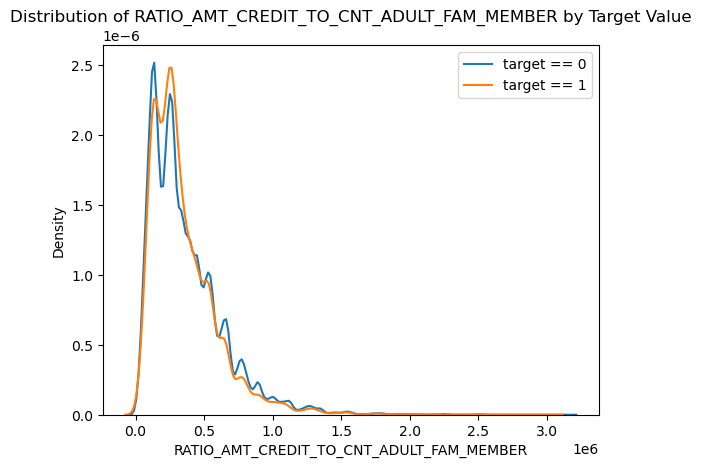

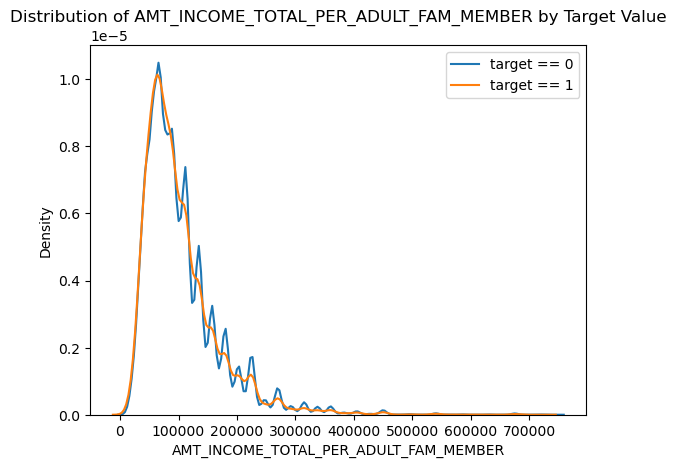

<Figure size 640x480 with 0 Axes>

In [186]:
# iterate through the sources
for i, source in enumerate(doamin_feats):
    
    # plot repaid loans
    sns.kdeplot(train_work.loc[train_work['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_work.loc[train_work['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend()
    plt.show()
plt.tight_layout(h_pad = 4.0) 

Actually, there are no effect of any features on the TARGER variables.

# Data Analysis

In [187]:
def pie_chart(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
    plt.pie(temp,labels=df['labels'], autopct='%.f%%', startangle=90)
    #plt.legend()
    plt.title("{}".format(x))
    plt.show()
    
def pie_chart_n(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index,'values': temp.values})
    fig = px.pie(df, values=temp.values, names=temp.index, title=x)
    fig.show()
    
def pie_chart_circle(x):
    temp = train[x].value_counts(normalize= True)
    df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
    
    fig1, ax1 = plt.subplots()
    ax1.pie(temp, labels=df['labels'], autopct='%1.1f%%', startangle=90)

    #draw circle
    centre_circle = plt.Circle((0,0),0.80,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.title("{}".format(x))
    #plt.legend()
    plt.tight_layout()
    plt.show()
    
def bar_chart(x):
    sns.set(style="whitegrid")
    ax = sns.countplot(x=x, data=train)
    plt.xticks(rotation=90)
    plt.show()
    
def bar_chart_pct(x):
    sns.set(style="whitegrid")
    ax = sns.histplot(train, x=x, stat="percent", multiple="dodge", shrink=.8)
    plt.xticks(rotation=90)
    plt.show()
    
def distribution(x):
    plot = sns.distplot(train[x])
    plt.title(x)
    plt.show()
    
# KDE plot for numerical features
def kde_target(df, col):
    sns.kdeplot(df.loc[df['TARGET'] == 0, col], label = 'target = 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, col], label = 'target = 1')
    plt.legend()

# Function to plot for categorical features
def plot_cat(feat):
    ##df1 contains percentage on total 
    temp = train.groupby([feat]).TARGET.value_counts()
    df1 = pd.DataFrame(temp).droplevel(1, axis=0).reset_index(level=[0])
    lst = []
    for i in range(df1['TARGET'].count()):
        temp = df1['TARGET'].iloc[i]/df1['TARGET'].sum()*100
        i += 1
        lst.append(temp)
    df1['Percentage on Total'] = lst
    
    ##df2 contains percentage on each values of TARGET
    df2 = pd.DataFrame(train.groupby([feat]).TARGET.value_counts(normalize=True))
    df2 = df2.droplevel(1, axis=0).reset_index(level=[0])
    df2 = df2.rename(columns= {'TARGET':'Partial Percentage'})
    df2['Partial Percentage'] = df2['Partial Percentage']*100
    
    ##join df1, df2
    df = df1.join(df2,how='left',lsuffix=' ', rsuffix='_right')
    df.drop(columns = feat + '_right', inplace= True)
    print(df)
    
    ##plot
    if train[feat].nunique() >= 5:
        sns.catplot(data= train, x= feat, hue= 'TARGET', kind= 'count',height= 4, aspect = 8, palette=sns.color_palette('Set2'))
    else:
        sns.set(rc={"figure.dpi":70, 'savefig.dpi':300})
        sns.catplot(data= train, x= feat, hue= 'TARGET', kind= 'count', palette=sns.color_palette('Set2'))

In [188]:
pie_chart_n("TARGET")

The data is **highly imbalanced**. Most of the client is able to repay for the loan.

## AGE

/tmp/ipykernel_32/1316477845.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/2929775173.py:48: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




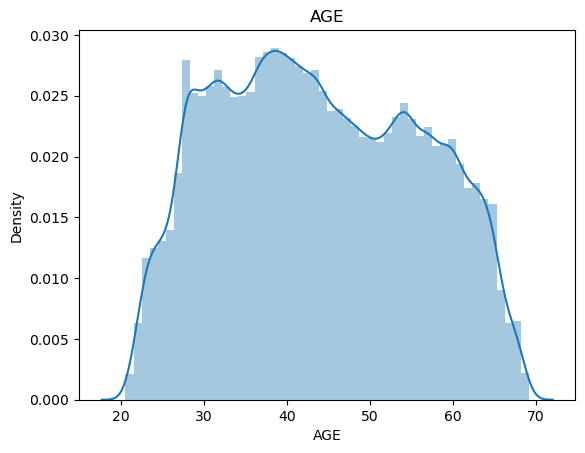

In [189]:
train['AGE'] = np.abs(train['DAYS_BIRTH'] / 365)
distribution('AGE')

The age of the client from 20 to 70. Most are in the range 25-45.

## GENDER

In [190]:
pie_chart_n("CODE_GENDER")

  CODE_GENDER   TARGET  Percentage on Total  Partial Percentage
0            F  188278            61.226428           93.000672
1            F   14170             4.607965            6.999328
2            M   94404            30.699390           89.858080
3            M   10655             3.464917           10.141920
4          XNA       4             0.001301          100.000000


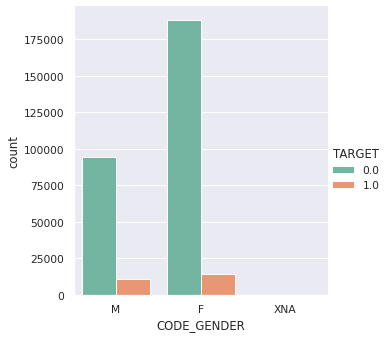

In [191]:
plot_cat('CODE_GENDER')

* The interesting part over here is the fact that Women took much more number of loans as compared to Men : Whereas Women took a total of 202K+ loans (about 66%), Men only took 105K+ loans (about 34%).
* However, at the same time, Men are slightly more capable of repaying the loan on time as compared to Women. Whereas Men are able to repay their loans in 10% of the cases, Women are only able to repay in 7% of the cases.
* There are 4 entries where Gender='XNA'. Since this is not providing us with much information, we can **remove these entries later on**.

## Dependents

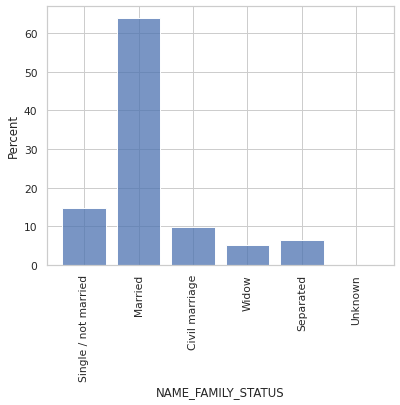

In [192]:
bar_chart_pct("NAME_FAMILY_STATUS")

     NAME_FAMILY_STATUS   TARGET  Percentage on Total  Partial Percentage
0         Civil marriage   26814             8.719688           90.055416
1         Civil marriage    2961             0.962892            9.944584
2                Married  181582            59.048945           92.440132
3                Married   14850             4.829096            7.559868
4              Separated   18150             5.902228           91.805766
5              Separated    1620             0.526810            8.194234
6   Single / not married   40987            13.328629           90.192325
7   Single / not married    4457             1.449379            9.807675
8                Unknown       2             0.000650          100.000000
9                  Widow   15151             4.926978           94.175783
10                 Widow     937             0.304705            5.824217


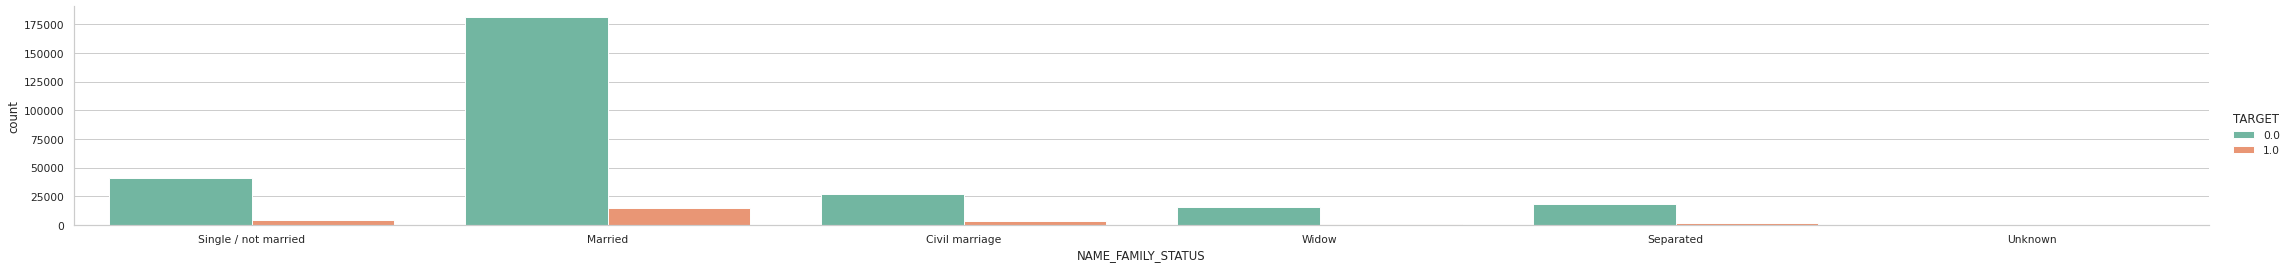

In [193]:
plot_cat('NAME_FAMILY_STATUS')

* Most the loans come from Married clients, about 64%. Other family status have quite same number of applications.
* The percentage of having payment difficulties cases is not too various, between 7.5% and 9.9%.
* Specially, Widows gave tendency to repay the loans on time the most, about 94%.
* There are **2 Unknown** values which not give much information -> we can **remove them later.**

In [194]:
pie_chart_n("CNT_CHILDREN")

In [195]:
pie_chart_n("CNT_FAM_MEMBERS")

* There are up to 70% of the client have no kids, 20% of them have only one child.
* More than a half of client is in two-member-family

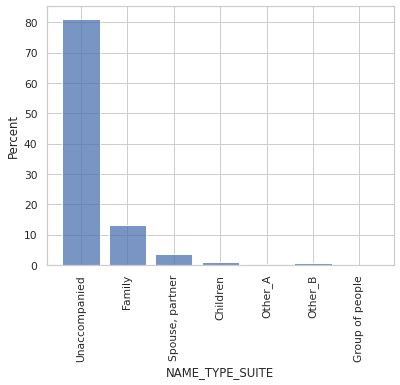

In [196]:
bar_chart_pct("NAME_TYPE_SUITE")

Most of client are in a marriage, but when apply for the loan, they are unaccompanied.

## LOAN

In [197]:
pie_chart_n("NAME_CONTRACT_TYPE")

  NAME_CONTRACT_TYPE   TARGET  Percentage on Total  Partial Percentage
0          Cash loans  255011            82.927440           91.654087
1          Cash loans   23221             7.551275            8.345913
2     Revolving loans   27675             8.999678           94.521671
3     Revolving loans    1604             0.521607            5.478329


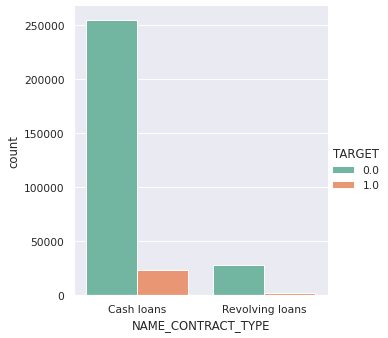

In [198]:
plot_cat('NAME_CONTRACT_TYPE')

* Most of the people are taking loans in the form of cash loans (90%) instead of revolving loans.
* Clients taking revolving loans seem to repay loan on time more than cash loan, but the difference not that much, 91,6% vs 94,5%.
* Cash loan clients tend to have payment difficulties more than who taking revolving ones, 8,3% vs 5,4%.

## Collateral

In [199]:
pie_chart_n("FLAG_OWN_CAR")

34% of client have (at least) a car, which can be a collateral

/tmp/ipykernel_32/247886051.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_32/247886051.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




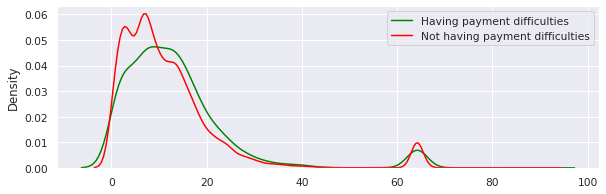

In [200]:
difficult_car_age = train[train['TARGET']==1]['OWN_CAR_AGE'].values
not_dif_car_age = train[train['TARGET']==0]['OWN_CAR_AGE'].values
plt.figure(figsize=(10,3))
sns.distplot(difficult_car_age,hist= False, label="Having payment difficulties", color='green')
sns.distplot(not_dif_car_age, hist= False, label="Not having payment difficulties", color='red')
plt.legend()
plt.show()

* Most of the clients have their cars less than 20 years old whereas there are very few cars that are older than 20 years.
* Clients have cars from 2 - 10 years old tend to have difficulties in repayment the loans.
* The number of missing values on 'OWN_CAR_AGE' is big (66%) and the percentage of having and not having payment difficulties at age out of range 2-10 is quite the same so we consider **drop this feature.**

In [201]:
pie_chart_n("FLAG_OWN_REALTY")

  FLAG_OWN_REALTY   TARGET  Percentage on Total  Partial Percentage
0                N   86357            28.082573           91.675071
1                N    7842             2.550153            8.324929
2                Y  196329            63.844545           92.038423
3                Y   16983             5.522729            7.961577


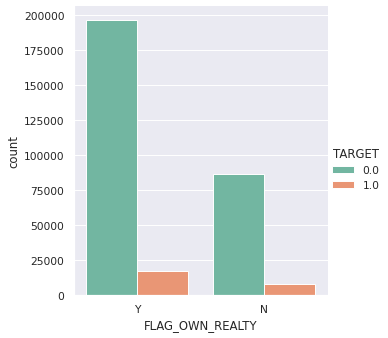

In [202]:
plot_cat('FLAG_OWN_REALTY')

* Nearly 70% of clients have a collateral like a house or an apartment
* However, again, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). We can conclude that this feature is **not very useful**.

In [204]:
pie_chart_n("NAME_HOUSING_TYPE")

     NAME_HOUSING_TYPE   TARGET  Percentage on Total  Partial Percentage
0       Co-op apartment    1033             0.335923           92.067736
1       Co-op apartment      89             0.028942            7.932264
2     House / apartment  251596            81.816911           92.204289
3     House / apartment   21272             6.917476            7.795711
4   Municipal apartment   10228             3.326060           91.460252
5   Municipal apartment     955             0.310558            8.539748
6      Office apartment    2445             0.795094           93.427589
7      Office apartment     172             0.055933            6.572411
8      Rented apartment    4280             1.391820           87.686949
9      Rented apartment     601             0.195440           12.313051
10         With parents   13104             4.261311           88.301887
11         With parents    1736             0.564533           11.698113


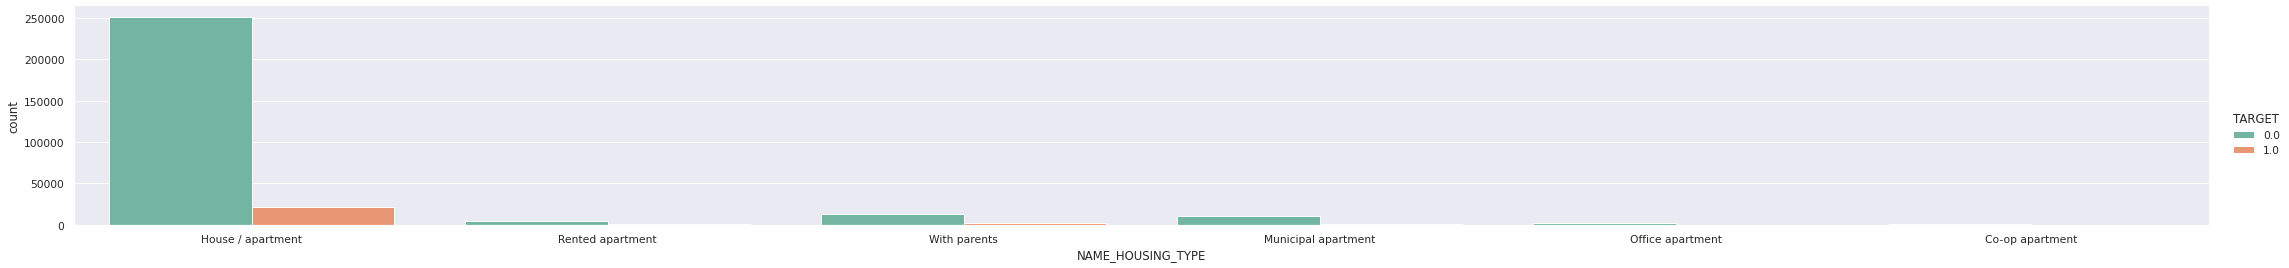

In [205]:
plot_cat('NAME_HOUSING_TYPE')

* The majority of loans comes from people living in a house/apartment, about 88.7%.
* The two groups having highest percentage of not repay on time are people living in Rented apartment and living With parents, about 12.3% and 11.7% relatively.
* The anothers doesn't show lot different, which take 6.5% - 8.5%.
* However, as we mentioned first, people living in a house/apartment take account for about **88%**, so this feature seems not to give exact insight -> we can **drop it.**

## Basic information regarding to job, occupation, finance

In [206]:
pie_chart_n("NAME_INCOME_TYPE")

       NAME_INCOME_TYPE   TARGET  Percentage on Total  Partial Percentage
0            Businessman      10             0.003252          100.000000
1   Commercial associate   66257            21.546221           92.515743
2   Commercial associate    5360             1.743027            7.484257
3        Maternity leave       3             0.000976           60.000000
4        Maternity leave       2             0.000650           40.000000
5              Pensioner   52380            17.033537           94.613634
6              Pensioner    2982             0.969721            5.386366
7          State servant   20454             6.651469           94.245035
8          State servant    1249             0.406164            5.754965
9                Student      18             0.005853          100.000000
10            Unemployed      14             0.004553           63.636364
11            Unemployed       8             0.002602           36.363636
12               Working  143550      

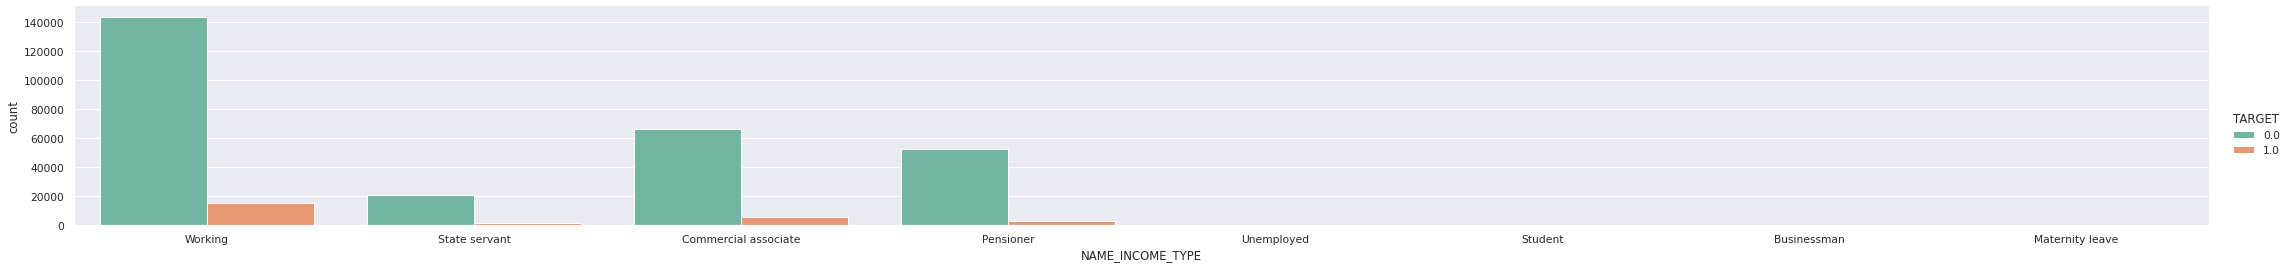

In [207]:
plot_cat('NAME_INCOME_TYPE')

* The majority of loans taken by people who are working (51%) whereas Commercial Associates, Pensioners and State Servants take considerably lesser number of loans.
* There is very little data related to Unemployed people, Students, Businessmen and women on Maternity leave.
* The interesting fact here is Students and Businessmen have no case of payment difficulties, they are capable to repay on time every loans they made.
* Among all income type, Students, Businessmen, women on Maternity leave, Unemployed people have good rate of repay on time. At the same time, Pensioner and State servant have the lowest rate, 5.3% and 5.7% relatively.

         OCCUPATION_TYPE   TARGET  Percentage on Total  Partial Percentage
0             Accountants    9339             4.423551           95.169673
1             Accountants     474             0.224517            4.830327
2          Cleaning staff    4206             1.992232           90.393295
3          Cleaning staff     447             0.211728            9.606705
4           Cooking staff    5325             2.522262           89.556004
5           Cooking staff     621             0.294146           10.443996
6              Core staff   25832            12.235695           93.696046
7              Core staff    1738             0.823228            6.303954
8                 Drivers   16496             7.813566           88.673870
9                 Drivers    2107             0.998011           11.326130
10               HR staff     527             0.249621           93.605684
11               HR staff      36             0.017052            6.394316
12  High skill tech staff

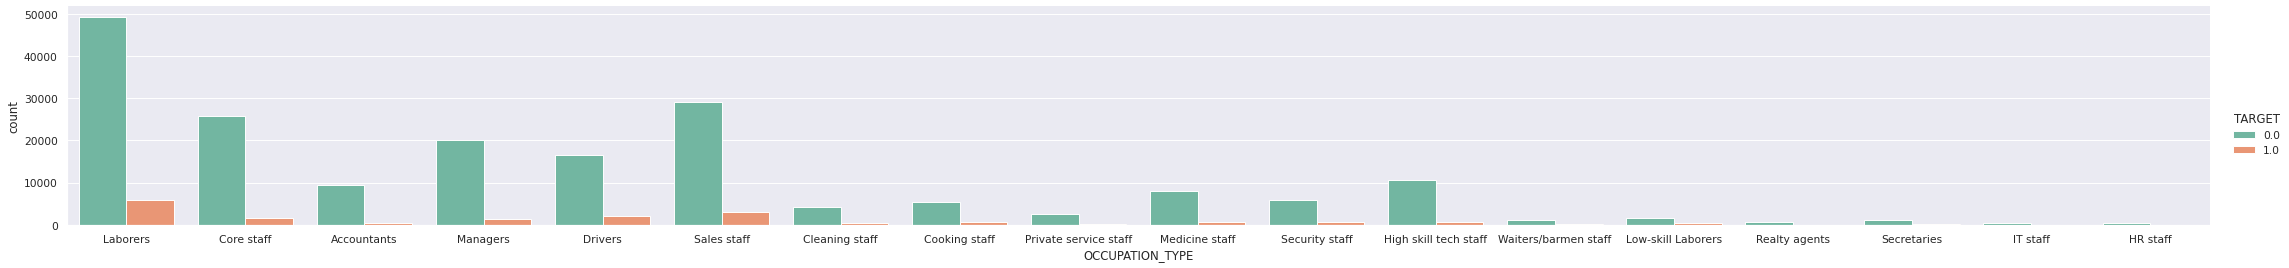

In [208]:
plot_cat('OCCUPATION_TYPE')

* The OCCUPATION_TYPE is pretty diverse.
* Among the applicants, the most common type of Occupation is Laborers contributing to close to 26% applications. The next most frequent occupation is Sales Staff, followed by Core Staff and Managers.
* Out of all the occupations, Low-skill Laborers are considered to be the least capable of repayment followed by Drivers, Waiters/barmen staff, Security staff and Laborers, in range from 10.5% to 17.1%. Besides, Sales, Cleaning and Cooking staff also have quite high default rate, over 9%. This shows that low-level Jobs people tend to have higher default rate.
* The lowest defaulting rate are among Accountants, Core Staff, Managers, High skill tech staff, HR staff, etc. which are from medium to high level jobs. (4.8% - 7.8%)
* Logically, it can be concluded that Low-level job workers tend to have a higher defaulting tendency compared to medium-high level jobs.

/tmp/ipykernel_32/2929775173.py:48: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




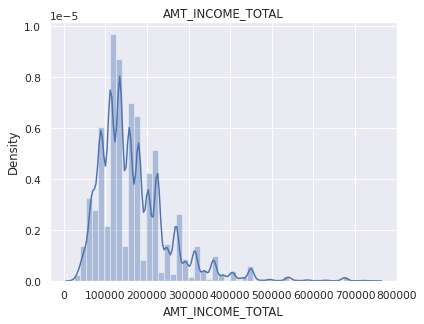

/tmp/ipykernel_32/2929775173.py:48: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




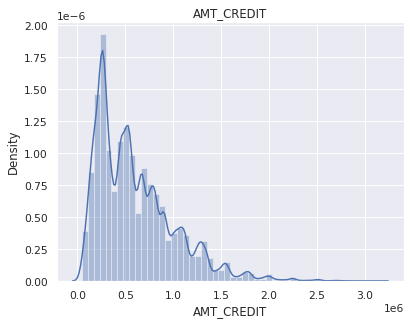

/tmp/ipykernel_32/2929775173.py:48: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




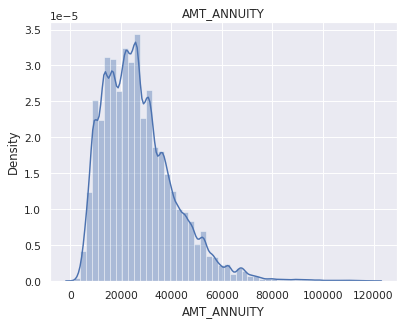

In [209]:
for each in ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]:
    distribution(each)

## Background information of the client

In [210]:
pie_chart_n("NAME_EDUCATION_TYPE")

            NAME_EDUCATION_TYPE   TARGET  Percentage on Total  \
0                Academic degree     161             0.052356   
1                Academic degree       3             0.000976   
2               Higher education   70854            23.041127   
3               Higher education    4009             1.303693   
4              Incomplete higher    9405             3.058427   
5              Incomplete higher     872             0.283567   
6                Lower secondary    3399             1.105326   
7                Lower secondary     417             0.135605   
8  Secondary / secondary special  198867            64.669882   
9  Secondary / secondary special   19524             6.349041   

   Partial Percentage  
0           98.170732  
1            1.829268  
2           94.644885  
3            5.355115  
4           91.515034  
5            8.484966  
6           89.072327  
7           10.927673  
8           91.060071  
9            8.939929  


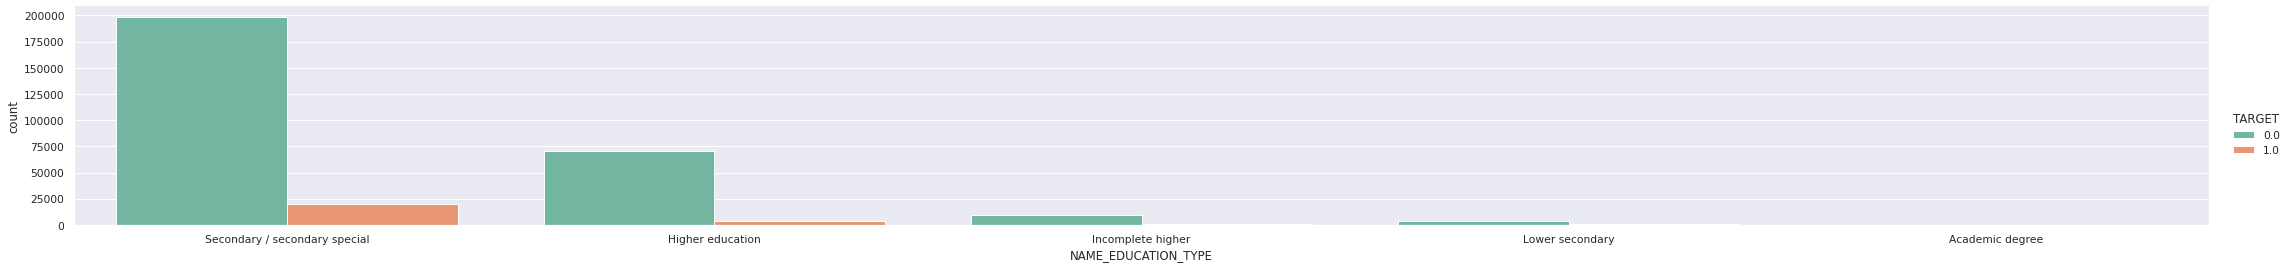

In [211]:
plot_cat('NAME_EDUCATION_TYPE')

* About 71% of people have had their education only till Secondary/Secondary Special, along with 24.34% clients having done Higher Education. This suggests that most of the clients/borrowers don't have a high education level.
* The chart quite match with logic, clients with higher education seems to have fewer payment difficulties than the lower.
* Among lower education groups, the percentage of having payment difficulties is not very different, about 8-10%.

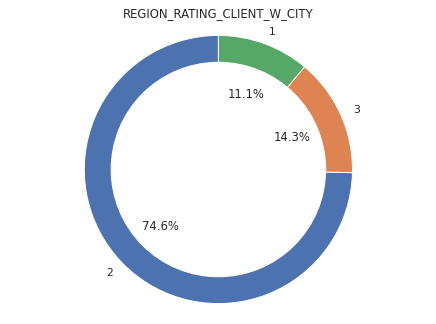

In [212]:
pie_chart_circle("REGION_RATING_CLIENT_W_CITY")

Most of the client lives in the 2nd rating region.

/tmp/ipykernel_32/2929775173.py:48: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




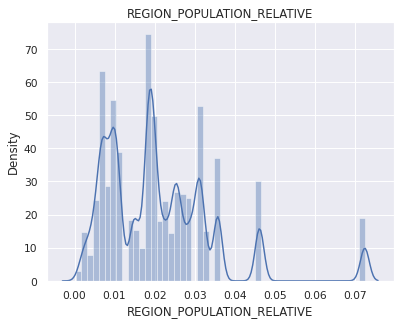

In [213]:
distribution("REGION_POPULATION_RELATIVE")

Most of the client live in the area which are not densly populated.

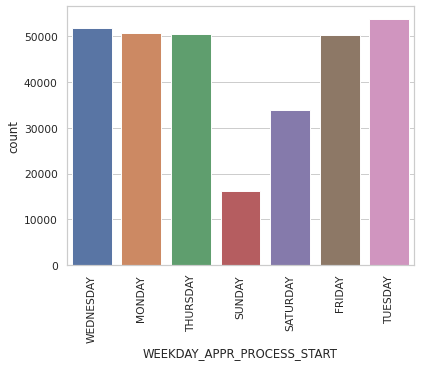

In [214]:
bar_chart("WEEKDAY_APPR_PROCESS_START")

   WEEKDAY_APPR_PROCESS_START   TARGET  Percentage on Total  \
0                       FRIDAY   46237            15.035885   
1                       FRIDAY    4101             1.333611   
2                       MONDAY   46780            15.212464   
3                       MONDAY    3934             1.279304   
4                     SATURDAY   31182            10.140125   
5                     SATURDAY    2670             0.868262   
6                       SUNDAY   14898             4.844705   
7                       SUNDAY    1283             0.417221   
8                     THURSDAY   46493            15.119134   
9                     THURSDAY    4098             1.332635   
10                     TUESDAY   49400            16.064466   
11                     TUESDAY    4501             1.463687   
12                   WEDNESDAY   47696            15.510339   
13                   WEDNESDAY    4238             1.378162   

    Partial Percentage  
0            91.853073  
1   

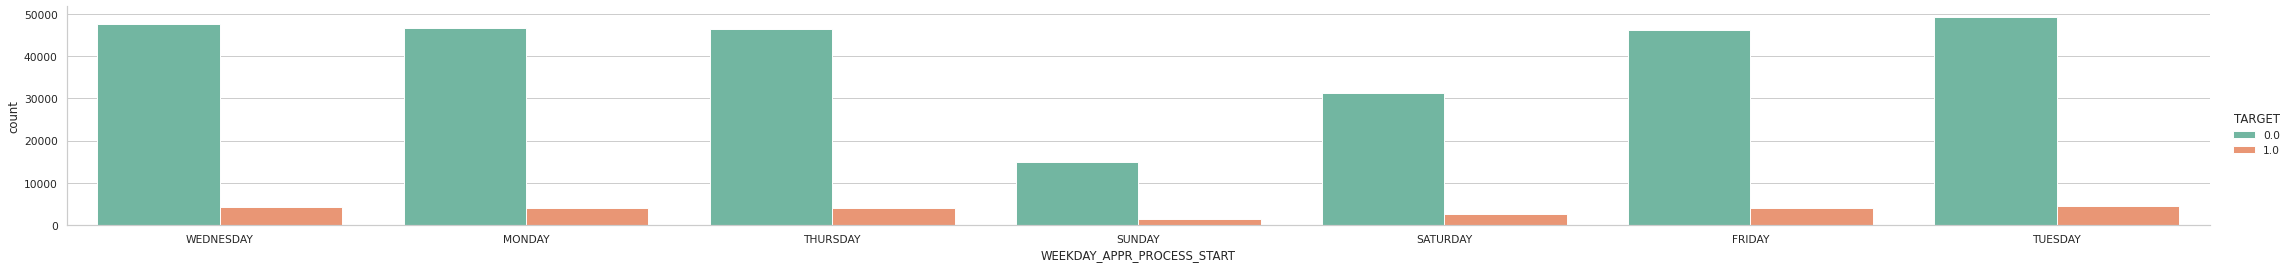

In [216]:
 plot_cat('WEEKDAY_APPR_PROCESS_START')

* It's interesting that the number of applications are spread almost uniformly throughout the weekdays (Monday-Friday) (approx. 50K applications per day) whereas the number of applications is very low on a weekend.

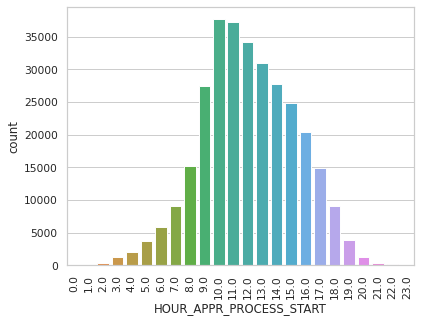

In [217]:
bar_chart("HOUR_APPR_PROCESS_START")

    HOUR_APPR_PROCESS_START   TARGET  Percentage on Total  Partial Percentage
0                        0.0      34             0.011057           85.000000
1                        0.0       6             0.001951           15.000000
2                        1.0      79             0.025690           91.860465
3                        1.0       7             0.002276            8.139535
4                        2.0     275             0.089428           90.163934
5                        2.0      30             0.009756            9.836066
6                        3.0    1123             0.365190           91.300813
7                        3.0     107             0.034796            8.699187
8                        4.0    1917             0.623392           91.722488
9                        4.0     173             0.056258            8.277512
10                       5.0    3253             1.057848           89.417262
11                       5.0     385             0.125199       

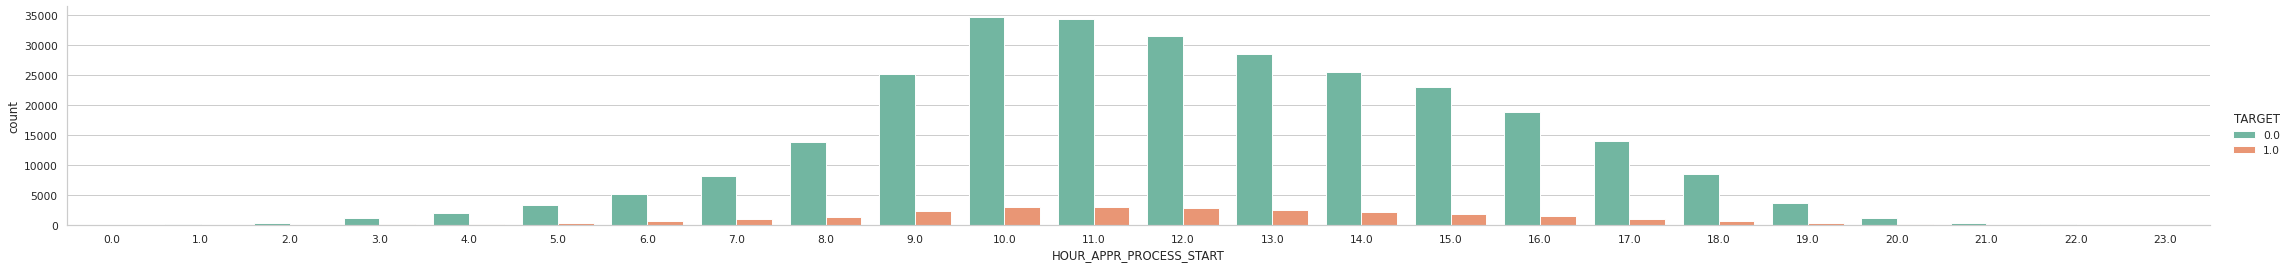

In [218]:
plot_cat('HOUR_APPR_PROCESS_START')

* The data seems to have quite uniform distribution in office hours from 7 a.m - 18 p.m. Specially, there are most applications in time from 9 a.m - 14 p.m.

58


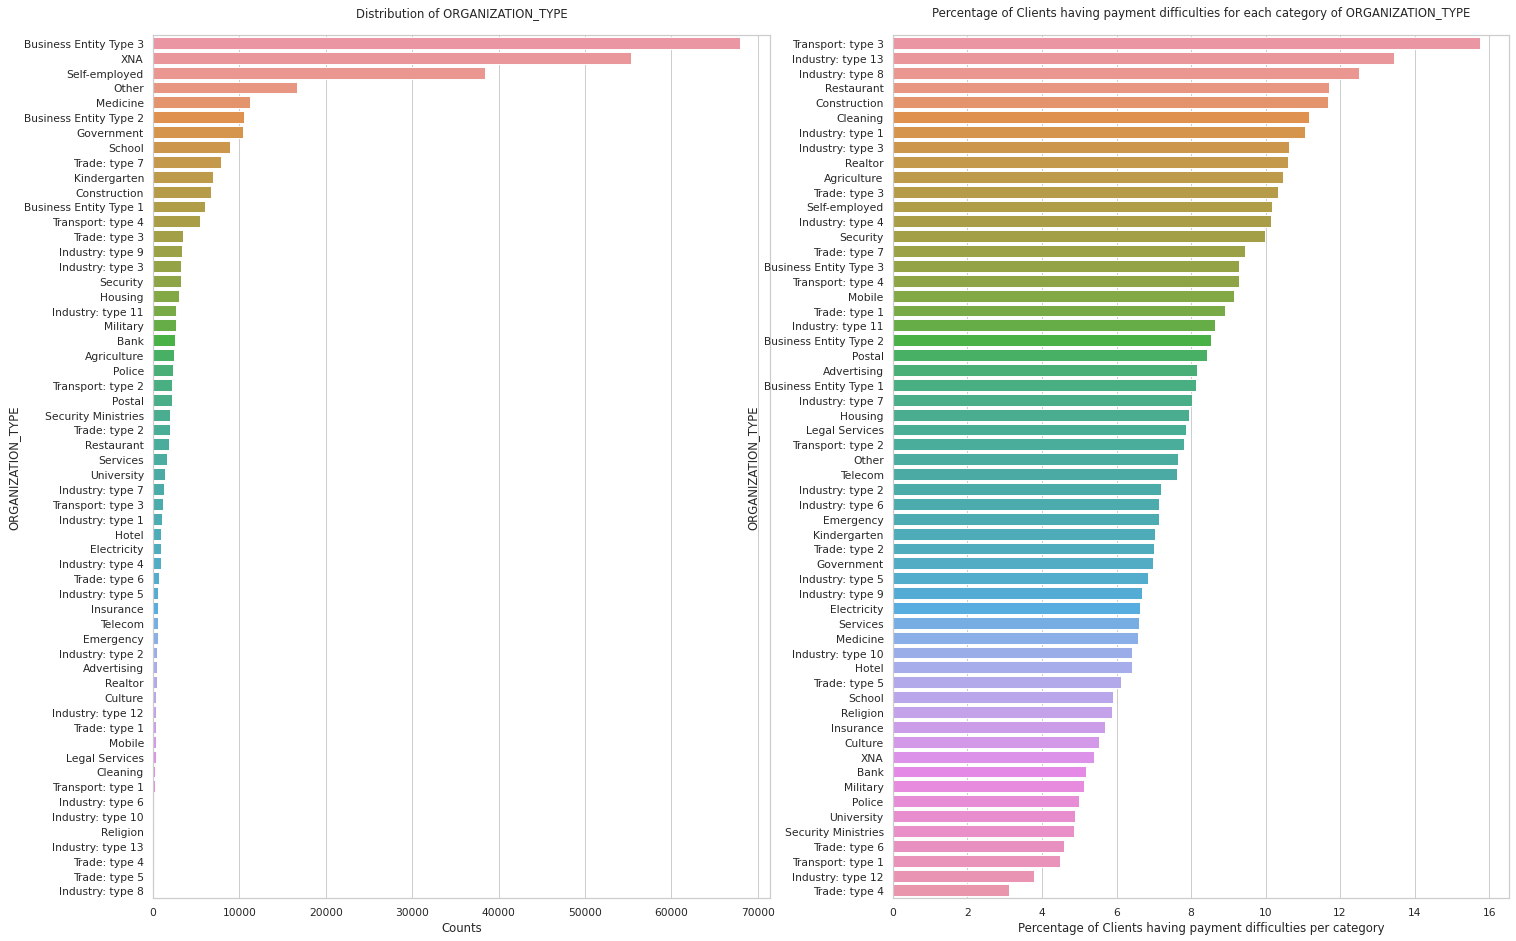

In [219]:
count_organization = train.ORGANIZATION_TYPE.value_counts().sort_values(ascending = False)
print(count_organization.nunique())

plt.figure(figsize = (25,16))

## plot distribution of ORGANIZATION_TYPE
plt.subplot(1,2,1)
sns.barplot(x = count_organization, y = count_organization.index)
plt.title('Distribution of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Counts')
plt.ylabel('ORGANIZATION_TYPE')

## plot percentage per each categories
plt.subplot(1,2,2)
percentage_pay_diff_per_organization = train[train.TARGET == 1].ORGANIZATION_TYPE.value_counts() * 100 / count_organization
percentage_pay_diff_per_organization = percentage_pay_diff_per_organization.dropna().sort_values(ascending = False)
sns.barplot(x = percentage_pay_diff_per_organization, y = percentage_pay_diff_per_organization.index)
plt.title('Percentage of Clients having payment difficulties for each category of ORGANIZATION_TYPE', pad = 20)
plt.xlabel('Percentage of Clients having payment difficulties per category')
plt.ylabel('ORGANIZATION_TYPE')

plt.show()

* There are a lots of organization types which the client belongs to, 58 to be precise.
* Most of the clients work in Business Entity Type3, XNA and Self Employed. There are almost 60K 'XNA' values, meaning unclassified type.
* From the second plot, we notice that the applicants belonging to Transport: type 3 have the highest defaulting tendency as compared to the rest. They are followed by organizations of types: Industry: type 13, Industry: type 8, Restaurant, Construction.
* The organizations which show lowest default rates are Trade: type 4, Industry: type 12.

# Missing values

In [258]:
test['AGE'] = np.abs(test['DAYS_BIRTH'] / 365)

/tmp/ipykernel_32/3379085254.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
## In test set, there is no value XNA in CODE_GENDER and Unknown in NAME_FAMILY_STATUS
## then in train set, we drop these rows

# CODE_GENDER: XNA:
train = train[train['CODE_GENDER'] != 'XNA']

# NAME_FAMILY_STATUS: Unknown
train = train[train['NAME_FAMILY_STATUS'] != 'Unknown']

In [231]:
cols = train.select_dtypes(include=['object']).columns.to_list()
for col in cols:
    print(col, test[test[col] == 'XNA'].shape)

NAME_CONTRACT_TYPE (0, 96)
CODE_GENDER (0, 96)
FLAG_OWN_CAR (0, 96)
FLAG_OWN_REALTY (0, 96)
NAME_TYPE_SUITE (0, 96)
NAME_INCOME_TYPE (0, 96)
NAME_EDUCATION_TYPE (0, 96)
NAME_FAMILY_STATUS (0, 96)
NAME_HOUSING_TYPE (0, 96)
OCCUPATION_TYPE (0, 96)
WEEKDAY_APPR_PROCESS_START (0, 96)
ORGANIZATION_TYPE (9274, 96)
FONDKAPREMONT_MODE (0, 96)
WALLSMATERIAL_MODE (0, 96)


replace XNA with NaN

In [240]:
train['ORGANIZATION_TYPE'].replace({'XNA': np.nan}, inplace = True)
test['ORGANIZATION_TYPE'].replace({'XNA': np.nan}, inplace = True)

/tmp/ipykernel_32/526317324.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
check_missing_data(train)

,Total,Percent
PREV_CRED_CARD_SK_DPD,231724,75.4
PREV_CRED_CARD_SK_DPD_DEF,231603,75.3
PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,229988,74.8
PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,230129,74.8
PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,230138,74.8
...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,1450,0.5
NAME_TYPE_SUITE,1290,0.4
EXT_SOURCE_2,660,0.2
AMT_INCOME_TOTAL,646,0.2


In [259]:
check_missing_data(test)

,Total,Percent
PREV_CRED_CARD_SK_DPD_DEF,34231,70.2
PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,34231,70.2
PREV_CRED_CARD_SK_DPD,34231,70.2
PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,34231,70.2
PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,34231,70.2
...,...,...
PREV_AMT_CREDIT,944,1.9
NUM_PREV_APPS,944,1.9
NAME_TYPE_SUITE,911,1.9
OBS_60_CNT_SOCIAL_CIRCLE,29,0.1


**Numerical:** median / mean

**Categorical:** Unknown

In [265]:
obj_cols = train.select_dtypes(['object']).columns.to_list()
median_cols = ['AGE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 
               'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'NUM_PREV_APPS']
mean_cols = list(set(train.columns) - set(obj_cols) - set(median_cols) - set(['TARGET']))

In [261]:
train[obj_cols] = train[obj_cols].fillna('Unknown')
train[median_cols] = train[median_cols].apply(lambda x: x.fillna(x.median()))
train[mean_cols] = train[mean_cols].apply(lambda x: x.fillna(x.mean()))

In [266]:
test[obj_cols] = test[obj_cols].fillna('Unknown')
test[median_cols] = test[median_cols].apply(lambda x: x.fillna(x.median()))
test[mean_cols] = test[mean_cols].apply(lambda x: x.fillna(x.mean()))

/tmp/ipykernel_32/3762597119.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3762597119.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32/3762597119.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
train.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [268]:
train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_PREVIOUS_LOANS,BUR_DAYS_CREDIT,BUR_DAYS_CREDIT_ENDDATE,BUR_DAYS_ENDDATE_FACT,BUR_AMT_CREDIT_MAX_OVERDUE,BUR_AMT_CREDIT_SUM,BUR_AMT_CREDIT_SUM_DEBT,BUR_AMT_CREDIT_SUM_LIMIT,BUR_DAYS_CREDIT_UPDATE,BUR_AMT_ANNUITY,BUR_BUR_BAL_MONTHS_BALANCE,NUM_PREV_APPS,PREV_AMT_ANNUITY,PREV_AMT_CREDIT,PREV_AMT_DOWN_PAYMENT,PREV_HOUR_APPR_PROCESS_START,PREV_RATE_DOWN_PAYMENT,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT,PREV_NFLAG_INSURED_ON_APPROVAL,PREV_POS_MONTHS_BALANCE,PREV_POS_CNT_INSTALMENT,PREV_POS_CNT_INSTALMENT_FUTURE,PREV_INS_PAY_NUM_INSTALMENT_VERSION,PREV_INS_PAY_NUM_INSTALMENT_NUMBER,PREV_INS_PAY_DAYS_INSTALMENT,PREV_INS_PAY_DAYS_ENTRY_PAYMENT,PREV_INS_PAY_AMT_INSTALMENT,PREV_INS_PAY_AMT_PAYMENT,PREV_CRED_CARD_MONTHS_BALANCE,PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,PREV_CRED_CARD_SK_DPD,PREV_CRED_CARD_SK_DPD_DEF,AGE
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.0,-3648.0,-2120.0,12.061121,0,1,0,Laborers,1.0,2,WEDNESDAY,10.0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.02470,0.036900,0.972200,0.619200,0.014300,0.000000,0.0690,0.083300,0.125000,0.03690,0.020200,0.019000,0.000000,0.000000,reg oper account,"Stone, brick",2.0,2.0,-1134.0,1,0.000000,0.00000,1.000000,8.000000,-874.000000,-349.000000,-697.500000,1681.029000,108131.945625,49156.200000,7997.141250,-499.875000,0.000000,-21.875000,1.0,9251.775000,179055.000000,0.000000,9.000000,0.000000,-606.000000,500.000000,24.000000,0.000000,-10.000000,24.000000,15.000000,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,-16.05068,222543.309831,14115.450060,3722.623938,9917.817811,74538.205558,1.497876,7.998155,0.027155,0.006409,25.920548
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765.0,-1186.0,-291.0,12.061121,0,1,0,Core staff,2.0,1,MONDAY,11.0,0,0,School,0.311267,0.622246,0.510856,0.09590,0.052900,0.985100,0.796000,0.060500,0.080000,0.0345,0.291700,0.333300,0.01300,0.077300,0.054900,0.003900,0.009800,reg oper account,Block,0.0,1.0,-828.0,1,0.000000,0.00000,0.000000,4.000000,-1400.750000,-544.500000,-1097.333333,0.000000,254350.125000,0.000000,3150.142026,-816.000000,11051.571991,-20.984805,3.0,56553.990000,484191.000000,3442.500000,14.666667,0.050030,-1305.000000,533.000000,10.000000,0.666667,-39.166667,9.791667,5.666667,1.047619,4.666667,-1164.333333,-1171.781746,78558.479286,78558.479286,-16.05068,222543.309831,14115.450060,3722.623938,9917.817811,74538.205558,1.497876,7.998155,0.027155,0.006409,45.931507
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not 

In [269]:
test.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NUM_PREVIOUS_LOANS,BUR_DAYS_CREDIT,BUR_DAYS_CREDIT_ENDDATE,BUR_DAYS_ENDDATE_FACT,BUR_AMT_CREDIT_MAX_OVERDUE,BUR_AMT_CREDIT_SUM,BUR_AMT_CREDIT_SUM_DEBT,BUR_AMT_CREDIT_SUM_LIMIT,BUR_DAYS_CREDIT_UPDATE,BUR_AMT_ANNUITY,BUR_BUR_BAL_MONTHS_BALANCE,NUM_PREV_APPS,PREV_AMT_ANNUITY,PREV_AMT_CREDIT,PREV_AMT_DOWN_PAYMENT,PREV_HOUR_APPR_PROCESS_START,PREV_RATE_DOWN_PAYMENT,PREV_DAYS_DECISION,PREV_SELLERPLACE_AREA,PREV_CNT_PAYMENT,PREV_NFLAG_INSURED_ON_APPROVAL,PREV_POS_MONTHS_BALANCE,PREV_POS_CNT_INSTALMENT,PREV_POS_CNT_INSTALMENT_FUTURE,PREV_INS_PAY_NUM_INSTALMENT_VERSION,PREV_INS_PAY_NUM_INSTALMENT_NUMBER,PREV_INS_PAY_DAYS_INSTALMENT,PREV_INS_PAY_DAYS_ENTRY_PAYMENT,PREV_INS_PAY_AMT_INSTALMENT,PREV_INS_PAY_AMT_PAYMENT,PREV_CRED_CARD_MONTHS_BALANCE,PREV_CRED_CARD_AMT_CREDIT_LIMIT_ACTUAL,PREV_CRED_CARD_AMT_DRAWINGS_CURRENT,PREV_CRED_CARD_AMT_INST_MIN_REGULARITY,PREV_CRED_CARD_AMT_PAYMENT_TOTAL_CURRENT,PREV_CRED_CARD_AMT_TOTAL_RECEIVABLE,PREV_CRED_CARD_CNT_DRAWINGS_CURRENT,PREV_CRED_CARD_CNT_INSTALMENT_MATURE_CUM,PREV_CRED_CARD_SK_DPD,PREV_CRED_CARD_SK_DPD_DEF,AGE
307511,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-5170.0,-812,11.786027,0,0,1,Unknown,2.0,2,TUESDAY,18,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066000,0.059000,0.973200,0.751137,0.047624,0.085168,0.137900,0.125000,0.238423,0.067192,0.105885,0.050500,0.009231,0.029387,Unknown,"Stone, brick",0.0,0.0,-1740.0,1,0.000000,0.000000,0.000000,7.000000,-735.000000,82.428571,-825.500000,3503.427054,207623.571429,85240.928571,0.000000,-93.142857,3545.357143,-11.785714,1.0,3951.000,23787.00000,2520.0000,13.000000,0.104326,-1740.000000,23.000000,8.000000,0.000000,-55.000000,4.000000,2.000000,1.250000,2.500000,-1664.000000,-1679.500000,7312.725000,7312.725000,-14.885355,220481.735662,13297.774680,3306.712519,10273.059980,66064.533750,1.556694,6.267538,1.978296,0.069726,52.715068
307512,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-9118.0,-1623,11.786027,0,0,0,Low-skill Laborers,2.0,2,FRIDAY,9,0,0,Self-employed,0.564990,0.291656,0.432962,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,Unknown,Unknown,0.0,0.0,0.0,1,0.000000,0.000000,3.000000,3.000000,-190.666667,439.333333,-123.000000,0.000000,219042.000000,189469.500000,0.000000,-54.333333,1420.500000,-3.000000,2.0,4813.200,20076.75000,4464.0000,10.500000,0.108964,-536.000000,18.000000,12.000000,0.000000,-20.000000,11.700000,7.200000,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000,-14.885355,220481.735662,13297.774680,3306.712519,10273.059980,66064.533750,1.556694,6.267538,1.978296,0.069726,49.490411
307513,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,Unknown,Working,Higher education,Married,House / apartment,0.019101,-20038,-2175.0,-3503,5.000000,0,0,0,Drivers,2.0,2,MONDAY,14,

Some features are recommended to be dropped out in the ANALYSIS part. However, we can use ML techniques to check which features are importance for further use.